In [49]:
import sys
sys.path.insert(0, '..')
from lineage import graphs, similarity
import pandas as pd
import os
import networkx as nx
import ipywidgets
import qgrid

import matplotlib.pyplot as plt

In [50]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
#RESULT_DIR = '/home/suhail/Projects/sample_workflows/million_notebooks/selected/'
RESULT_DIR = '/home/suhail/Projects/relic/primitives/python/generator/dataset/'

#RESULT_DIR = '/home/suhail/Projects/relic/primitives/python/generator/nopivot/'
notebooks = [d for d in os.listdir(RESULT_DIR) if os.path.isdir(os.path.join(RESULT_DIR, d))]
notebooks

['20200824-012802',
 '20200824-003649',
 '20200824-003745',
 '20200824-003804',
 '20200824-012406',
 '20200824-012423',
 '20200824-012848',
 '20200824-012459',
 '20200824-012346',
 '20200824-012732',
 '20200824-012613',
 '20200824-015758',
 '20200824-010355',
 '20200824-012607',
 '20200824-003642',
 '20200824-014633',
 '20200824-003749',
 '20200824-014759',
 '20200824-013613',
 '20200824-015640',
 '20200824-012932',
 '20200824-014700',
 '20200824-012310',
 '20200824-003816',
 '20200824-003813',
 '20200824-012907',
 '20200824-010416',
 '20200824-013013',
 '20200824-015732',
 '20200824-013643',
 '20200824-010153',
 '20200824-014136',
 '20200824-012812',
 '20200824-004325',
 '20200824-004719',
 '20200824-003659',
 '20200824-013211',
 '20200824-012342',
 '20200824-003652',
 '20200824-014838',
 '20200824-012410',
 '20200824-012434',
 '20200824-010338',
 '20200824-003645',
 '20200824-003753',
 '20200824-012542',
 '20200824-010252',
 '20200824-012612',
 '20200824-014422',
 '20200824-012316',


In [52]:
def load_result_graph_statistics(result_dir, nb, metric):
    g_truth = graphs.get_graph(RESULT_DIR, nb).to_undirected()
    g_infered = graphs.get_graph_edge_list(RESULT_DIR, nb, metric)
    
    edges_data = []
    
    for src,dst,e_data in g_infered.edges(data=True):
        edge_result = {}
        edge_result['src'] = src
        edge_result['dest'] = dst
        edge_result['notebook'] = nb
        edge_result['metric'] = metric
        edge_result['g_truth'] = g_truth.has_edge(src,dst)
        edge_result['type'] = e_data['type']
        edge_result['weight'] = e_data['weight']
        if g_truth.has_edge(src,dst):
            edge_result['operation'] = g_truth[src][dst]['operation']
            
        edges_data.append(edge_result)
        
    return pd.DataFrame(edges_data)
    
    
def ground_truth_edges(result_dir, nb, metric):
    g_truth = graphs.get_graph(RESULT_DIR, nb).to_undirected()
    g_infered = graphs.get_graph_edge_list(RESULT_DIR, nb, metric)
    
    edges_data = []
    
    for src,dst,e_data in g_truth.edges(data=True):
        edge_result = {}
        edge_result['src'] = src
        edge_result['dest'] = dst
        edge_result['notebook'] = nb
        edge_result['metric'] = metric
        edge_result['g_inferred'] = g_infered.has_edge(src,dst)
        edge_result['operation'] = e_data['operation']
        if g_infered.has_edge(src,dst):
            edge_result['type'] = g_infered[src][dst]['type']
            edge_result['weight'] = g_infered[src][dst]['weight']
            
            
        edges_data.append(edge_result)
        
    return pd.DataFrame(edges_data)

def edge_cat(truth, inferred):
    return_str = ''
    if truth:
        return_str += 'T'
    else:
        return_str += 'F'
    if inferred:
        return_str += 'P'
    else:
        return_str += 'N'
        
    return return_str


def get_stage_graph(nb,metric):
    g = nx.read_gpickle(RESULT_DIR+'/'+nb+'/inferred/'+metric+'_stage_graph.pkl')
    return g


def all_edges(result_dir, nb, metric):
    g_truth = graphs.get_graph(RESULT_DIR, nb).to_undirected()
    g_infered = graphs.get_graph_edge_list(RESULT_DIR, nb, metric)
    stage_graph = get_stage_graph(nb,metric)
    
    edges_data = []
    
    all_pw_jaccard_graph = nx.read_gpickle(result_dir+nb+'/inferred/cell_sim.pkl')
        
    for src,dst in all_pw_jaccard_graph.edges():
        #print(nb,src,dst)
        edge_result = {}
        edge_result['src'] = src
        edge_result['dest'] = dst
        edge_result['notebook'] = nb
        edge_result['metric'] = metric
        edge_result['g_inferred'] = g_infered.has_edge(src,dst)
        if g_infered.has_edge(src,dst):
            edge_result['type'] = g_infered[src][dst]['type']
            edge_result['weight'] = g_infered[src][dst]['weight']
        edge_result['g_truth'] = g_truth.has_edge(src,dst)
        if g_truth.has_edge(src,dst):
            edge_result['operation'] = g_truth[src][dst]['operation']
            
            
        stage_dict = stage_graph[src][dst]
        #edge_result.update(stage_dict)            
        edge_result.update( {k:v for (k,v) in stage_dict.items() if 'stage' in k})            
            
        edges_data.append(edge_result)
        
    return pd.DataFrame(edges_data)

In [53]:
#metrics = ['col', 'cell', 'pc2cellcol']
#metrics = ['pc2cellcol+group+join+pivot']
metrics = ['cell', 'pc2cell+group+join+pivot', 'pc2cellcol', 'pc2cellcol+group+join+pivot','col']



all_results = pd.DataFrame()
for nb in notebooks:  
    for metric in metrics:
        try:
            all_results = all_results.append(all_edges(RESULT_DIR, nb, metric))
        except FileNotFoundError as e:
            print(nb, metric)
            pass

20200824-013613 cell
20200824-013613 pc2cell+group+join+pivot
20200824-013613 pc2cellcol
20200824-013613 pc2cellcol+group+join+pivot
20200824-013613 col
20200824-012907 cell
20200824-012907 pc2cell+group+join+pivot
20200824-012907 pc2cellcol
20200824-012907 pc2cellcol+group+join+pivot
20200824-012907 col
20200824-012612 cell
20200824-012612 pc2cell+group+join+pivot
20200824-012612 pc2cellcol
20200824-012612 pc2cellcol+group+join+pivot
20200824-012612 col
20200824-014422 cell
20200824-014422 pc2cell+group+join+pivot
20200824-014422 pc2cellcol
20200824-014422 pc2cellcol+group+join+pivot
20200824-014422 col
20200824-014818 cell
20200824-014818 pc2cell+group+join+pivot
20200824-014818 pc2cellcol
20200824-014818 pc2cellcol+group+join+pivot
20200824-014818 col
20200824-013445 cell
20200824-013445 pc2cell+group+join+pivot
20200824-013445 pc2cellcol
20200824-013445 pc2cellcol+group+join+pivot
20200824-013445 col


In [54]:
all_results = all_results.replace('join', 'merge')

In [55]:
## import qgrid
qgrid_widget = qgrid.show_grid(all_results, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [31]:
# Graph Verification
g_truth = graphs.get_graph(RESULT_DIR, '20200824-012423')
g_truth.edges()

OutEdgeView([('0.csv', '1.csv'), ('0.csv', '3.csv'), ('0.csv', '4.csv'), ('1.csv', '2.csv'), ('4.csv', '6.csv'), ('4.csv', '7.csv'), ('4.csv', '9.csv'), ('5.csv', '6.csv'), ('5.csv', '12.csv'), ('7.csv', '10.csv'), ('7.csv', '13.csv'), ('8.csv', '9.csv'), ('9.csv', '14.csv'), ('9.csv', '16.csv'), ('9.csv', '18.csv'), ('10.csv', '11.csv'), ('11.csv', '15.csv'), ('12.csv', '19.csv'), ('16.csv', '17.csv'), ('16.csv', '20.csv'), ('20.csv', '21.csv'), ('20.csv', '22.csv')])

In [40]:
df = qgrid_widget.get_changed_df()
nb = '20200720-111907'
col_TP = df.loc[(df.notebook == nb) & (df.metric == 'col') & (df.g_truth == True) & (df.g_inferred == True)]
cell_TP = df.loc[(df.notebook == nb) & (df.metric == 'pc2cellgt+group+join+pivot') & (df.g_truth == True) & (df.g_inferred == True)]
col_TP_edges = col_TP.set_index(['notebook', 'src', 'dest']).index
cell_TP_edges = cell_TP.set_index(['notebook', 'src', 'dest']).index
symmdiff_index_TP = col_TP_edges.difference(cell_TP_edges)
symmdiff_index_TP

MultiIndex([('20200720-111907', '13.csv', '18.csv'),
            ('20200720-111907', '13.csv', '21.csv'),
            ('20200720-111907', '13.csv', '25.csv'),
            ('20200720-111907', '18.csv', '17.csv')],
           names=['notebook', 'src', 'dest'])

In [39]:
df = all_results
col_TP = df.loc[(df.metric == 'col') & (df.g_truth == True) & (df.g_inferred == True)]
cell_TP = df.loc[(df.metric == 'pc2cellgt+group+join+pivot') & (df.g_truth == True) & (df.g_inferred == True)]

col_TP_edges = col_TP.set_index(['notebook', 'src', 'dest']).index
cell_TP_edges = cell_TP.set_index(['notebook', 'src', 'dest']).index
symmdiff_index_TP = col_TP_edges.difference(cell_TP_edges)
symmdiff_index_TP
indexed_col_TP = col_TP.set_index(['notebook', 'src', 'dest'])
indexed_col_TP = indexed_col_TP.reindex(symmdiff_index_TP)
indexed_col_TP

metric  g_inferred type    weight  g_truth  \
notebook        src    dest                                                
20200824-012802 13.csv 0.csv     col        True  col  0.998020     True   
                9.csv  8.csv     col        True  col  0.916667     True   
                       24.csv    col        True  col  0.944444     True   
                7.csv  8.csv     col        True  col  0.333333     True   
                       10.csv    col        True  col  0.666667     True   
...                              ...         ...  ...       ...      ...   
20200824-013525 25.csv 26.csv    col        True  col  0.958333     True   
                0.csv  1.csv     col        True  col  0.999000     True   
                50.csv 42.csv    col        True  col  0.719298     True   
                26.csv 35.csv    col        True  col  0.978261     True   
                1.csv  3.csv     col        True  col  0.999010     True   

                              stage_0     stage_1  stage_1_weight stage_1_op  \
notebook        src    dest                                                    
20200824-012802 13.csv 0.csv    input  considered        0.998020   selected   
                9.csv  8.csv    input  considered        0.916667   selected   
                       24.csv   input  considered        0.944444        NaN   
                7.csv  8.csv    input  considered        0.333333        NaN   
                       10.csv   input  considered        0.666667   selected   
...                               ...         ...             ...        ...   
20200824-013525 25.csv 26.csv   input  considered        0.958333   selected   
                0.csv  1.csv    input  considered        0.999000        NaN   
                50.csv 42.csv   input  considered        0.719298   selected   
                26.csv 35.csv   input  considered        0.978261   selected   
                1.csv  3.csv    input  considered        0.999010   selected   

                                operation  ... stage_1_intra_op  \
notebook        src    dest                ...                    
20200824-012802 13.csv 0.csv   point_edit  ...              NaN   
                9.csv  8.csv       sample  ...              NaN   
                       24.csv  point_edit  ...              NaN   
                7.csv  8.csv      groupby  ...              NaN   
                       10.csv     dropcol  ...              NaN   
...                                   ...  ...              ...   
20200824-013525 25.csv 26.csv     dropcol  ...              NaN   
                0.csv  1.csv   point_edit  ...              NaN   
                50.csv 42.csv      sample  ...              NaN   
                26.csv 35.csv  point_edit  ...              NaN   
                1.csv  3.csv   point_edit  ...              NaN   

                               stage_2_inter_op stage_3_group_op  \
notebook        src    dest                                        
20200824-012802 13.csv 0.csv                NaN              NaN   
                9.csv  8.csv                NaN              NaN   
                       24.csv               NaN              NaN   
                7.csv  8.csv                NaN              NaN   
                       10.csv               NaN              NaN   
...                                         ...              ...   
20200824-013525 25.csv 26.csv               NaN              NaN   
                0.csv  1.csv                NaN              NaN   
                50.csv 42.csv               NaN              NaN   
                26.csv 35.csv               NaN              NaN   
                1.csv  3.csv                NaN              NaN   

                               stage_4_join stage_4_join_weight  \
notebook        src    dest                                       
20200824-012802 13.csv 0.csv            NaN                 NaN   
                9.csv  8.csv            Na

In [40]:
all_cell = df.loc[(df.metric == 'pc2cellcol+group+join+pivot')]
indexed_cell_TP = all_cell.set_index(['notebook', 'src', 'dest'])
indexed_cell_TP = indexed_cell_TP.reindex(symmdiff_index_TP)
qgrid_widget = qgrid.show_grid(indexed_cell_TP, show_toolbar=True)
qgrid_widget


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [59]:
all_cell = all_results.loc[(all_results.metric == 'pc2cellcol+group+join+pivot')]
correct = all_cell.loc[((all_cell.g_truth == True) & (all_cell.g_inferred == True))]
missed = all_cell.loc[((all_cell.g_truth == True) & (all_cell.g_inferred == False))]
mistakes = all_cell.loc[((all_cell.g_truth == False) & (all_cell.g_inferred == True))]
missed.groupby('operation').count()


,src,dest,notebook,metric,g_inferred,type,weight,g_truth,stage_0,stage_1,...,stage_1_intra_op,stage_2_inter_op,stage_4_join,stage_4_join_weight,stage_5_pivot,stage_5_pivot_weight,stage_3_group_op,stage_4_join_op,stage_4_pivot_op,stage_5_pivot_op
operation,,,,,,,,,,,,,,,,,,,,,
assign,9,9,9,9,9,0,0,9,9,0,...,0,0,0,0,0,0,0,0,0,0
dropcol,71,71,71,71,71,0,0,71,71,0,...,0,0,29,29,24,24,0,0,0,0
groupby,54,54,54,54,54,0,0,54,54,0,...,0,0,0,0,0,0,0,0,0,0
merge,67,67,67,67,67,0,0,67,67,0,...,0,0,11,11,3,3,0,0,0,0
pivot,164,164,164,164,164,0,0,164,164,0,...,0,0,164,164,164,164,0,0,0,0
sample,27,27,27,27,27,0,0,27,27,0,...,0,0,2,2,2,2,0,0,0,0


In [57]:
all_cell.groupby('operation').count()

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,stage_0,stage_1,...,stage_1_intra_op,stage_2_inter_op,stage_4_join,stage_4_join_weight,stage_5_pivot,stage_5_pivot_weight,stage_3_group_op,stage_4_join_op,stage_4_pivot_op,stage_5_pivot_op
operation,,,,,,,,,,,,,,,,,,,,,
assign,349,349,349,349,349,340,340,349,349,0,...,0,171,329,329,0,0,0,0,0,0
dropcol,527,527,527,527,527,456,456,527,527,0,...,0,213,468,468,24,24,0,4,0,0
groupby,215,215,215,215,215,161,161,215,215,0,...,5,39,157,157,0,0,39,0,0,0
merge,670,670,670,670,670,603,603,670,670,0,...,0,239,602,602,3,3,0,123,0,0
pivot,267,267,267,267,267,103,103,267,267,0,...,0,0,267,267,267,267,0,0,0,50
point_edit,408,408,408,408,408,408,408,408,408,0,...,408,0,402,402,0,0,0,0,0,0
sample,433,433,433,433,433,406,406,433,433,0,...,406,0,393,393,2,2,0,0,0,0


In [58]:
correct.groupby('operation').count()

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,stage_0,stage_1,...,stage_1_intra_op,stage_2_inter_op,stage_4_join,stage_4_join_weight,stage_5_pivot,stage_5_pivot_weight,stage_3_group_op,stage_4_join_op,stage_4_pivot_op,stage_5_pivot_op
operation,,,,,,,,,,,,,,,,,,,,,
assign,340,340,340,340,340,340,340,340,340,0,...,0,171,329,329,0,0,0,0,0,0
dropcol,456,456,456,456,456,456,456,456,456,0,...,0,213,439,439,0,0,0,4,0,0
groupby,161,161,161,161,161,161,161,161,161,0,...,5,39,157,157,0,0,39,0,0,0
merge,603,603,603,603,603,603,603,603,603,0,...,0,239,591,591,0,0,0,123,0,0
pivot,103,103,103,103,103,103,103,103,103,0,...,0,0,103,103,103,103,0,0,0,50
point_edit,408,408,408,408,408,408,408,408,408,0,...,408,0,402,402,0,0,0,0,0,0
sample,406,406,406,406,406,406,406,406,406,0,...,406,0,391,391,0,0,0,0,0,0


In [47]:
mistakes.groupby('type').count()

,src,dest,notebook,metric,g_inferred,weight,g_truth,stage_0,stage_1,stage_1_weight,...,stage_1_intra_op,stage_2_inter_op,stage_3_group_op,stage_4_join,stage_4_join_weight,stage_5_pivot,stage_5_pivot_weight,stage_4_pivot_op,stage_4_join_op,stage_5_pivot_op
type,,,,,,,,,,,,,,,,,,,,,
cell,59,59,59,59,59,59,59,59,0,0,...,58,0,0,47,47,0,0,0,0,0
col,116,116,116,116,116,116,116,116,0,0,...,0,52,0,105,105,0,0,0,0,0
groupby,27,27,27,27,27,27,27,27,0,0,...,0,0,10,25,25,0,0,0,0,0
merge,22,22,22,22,22,22,22,22,0,0,...,0,7,0,22,22,0,0,0,7,0
pivot,129,129,129,129,129,129,129,129,0,0,...,0,0,0,126,126,126,126,1,0,66


In [46]:
correct = all_cell.loc[((all_cell.g_truth == True) & (all_cell.g_inferred == True))]
correct.groupby(['operation', 'type']).count()

src  dest  notebook  metric  g_inferred  weight  g_truth  \
operation  type                                                                
assign     col      340   340       340     340         340     340      340   
           merge      1     1         1       1           1       1        1   
dropcol    col      449   449       449     449         449     449      449   
           merge      2     2         2       2           2       2        2   
groupby    cell       5     5         5       5           5       5        5   
           col       69    69        69      69          69      69       69   
           groupby   92    92        92      92          92      92       92   
merge      col      382   382       382     382         382     382      382   
           merge    216   216       216     216         216     216      216   
pivot      pivot    105   105       105     105         105     105      105   
point_edit cell     407   407       407     407         407     407      407   
           merge      1     1         1       1           1       1        1   
sample     cell     406   406       406     406         406     406      406   

                    stage_0  stage_1  stage_1_weight  ...  stage_1_intra_op  \
operation  type                                       ...                     
assign     col          340        0               0  ...                 0   
           merge          1        0               0  ...                 0   
dropcol    col          449        0               0  ...                 0   
           merge          2        0               0  ...                 0   
groupby    cell           5        0               0  ...                 5   
           col           69        0               0  ...                 0   
           groupby       92        0               0  ...                 0   
merge      col          382        0               0  ...                 0   
           merge        216        0               0  ...                 0   
pivot      pivot        105        0               0  ...                 0   
point_edit cell         407        0               0  ...               407   
           merge          1        0               0  ...                 1   
sample     cell         406        0               0  ...               406   

                    stage_2_inter_op  stage_3_group_op  stage_4_join  \
operation  type                                                        
assign     col                   158                 0           294   
           merge                   1                 0             1   
dropcol    col                   214                 0           396   
           merge                   2                 0             2   
groupby    cell                    0                 0             5   
           col                    27                 0            62   
           groupby                 0                43            83   
merge      col                   201                 0           338   
           merge                  54                 0           216   
pivot      pivot                   0                 0           104   
point_edit cell                    0                 0           349   
           merge                   0                 0             1   
sample     cell                    0                 0           351   

                    stage_4_join_weight  stage_5_pivot  stage_5_pivot_weight  \
operation  type                                                                
assign     col                      294              0                     0   
           merge                      1              0                     0   
dropcol    col                      396              0                     0   
           merge                      2              0                     0   
groupby    cell                       5              0                  

In [48]:
all_results.loc[all_results.metric == 'col'].groupby('operation').count()[['src']].rename({'src' : 'count'}, axis=1)

,count
operation,
assign,349
dropcol,527
groupby,215
merge,670
pivot,267
point_edit,408
sample,433


In [1103]:
TN_edges =  qgrid_widget.get_changed_df()

In [1104]:
TN_edges.groupby('operation').count()

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,stage_0,stage_1,...,stage_1_intra_op,stage_2_inter,stage_2_inter_weight,stage_2_inter_op,stage_4_join,stage_4_join_weight,stage_3_group,stage_3_group_weight,stage_4_join_op,stage_3_group_op
operation,,,,,,,,,,,,,,,,,,,,,
assign,4,4,4,4,4,0,4,4,4,0,...,0,4,4,0,0,0,0,0,0,0
dropcol,4,4,4,4,4,0,4,4,4,0,...,0,4,4,0,0,0,0,0,0,0
groupby,21,21,21,21,21,0,21,21,21,0,...,0,5,5,0,0,0,3,3,0,0
merge,25,25,25,25,25,0,25,25,25,0,...,0,25,25,0,24,24,24,24,0,0
point_edit,2,2,2,2,2,0,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
sample,1,1,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1182]:
coledges.loc[(coledges.notebook=='20200706-140024') & (coledges.weight > 0)].groupby('weight').count()

,src,dest,notebook,metric,g_inferred,type,g_truth,operation,stage_0,stage_1,...,stage_1_intra_op,stage_4_join,stage_4_join_weight,stage_2_inter,stage_2_inter_weight,stage_3_group,stage_3_group_weight,stage_4_join_op,stage_2_inter_op,stage_3_group_op
weight,,,,,,,,,,,,,,,,,,,,,
0.000012,3,3,3,3,3,0,3,0,3,0,...,0,0,0,0,0,0,0,0,0,0
0.000013,6,6,6,6,6,0,6,0,6,0,...,0,0,0,0,0,0,0,0,0,0
0.000016,2,2,2,2,2,0,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
0.000017,2,2,2,2,2,0,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
0.000017,6,6,6,6,6,0,6,0,6,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.997101,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
0.998571,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
0.998594,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [858]:
selected_row = qgrid_widget.get_selected_df()
inspect_row_dataframes(selected_row)

/home/suhail/anaconda3/envs/relic/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


51.csv 54.csv


,company,iso8601,address,ascii_company_email,address__swapcase,word,ascii_free_email,currency_name,suffix,numerify,random_int,randomize_nb_elements,file_name
294,Abbott-Mcgee,1,1,1,1,apply,cnguyen@hotmail.com,Indonesian rupiah,Jr.,656.0,9997.0,12.0,machine.xlsx
1233,Abbott-Owens,1,1,1,1,apply,cnguyen@hotmail.com,Indonesian rupiah,Jr.,656.0,9997.0,12.0,machine.xlsx
2172,Acevedo-Fowler,1,1,1,1,apply,cnguyen@hotmail.com,Indonesian rupiah,Jr.,656.0,9997.0,12.0,machine.xlsx
3111,Adams-Hawkins,1,1,1,1,apply,cnguyen@hotmail.com,Indonesian rupiah,Jr.,656.0,9997.0,12.0,machine.xlsx
4050,Adams-White,1,1,1,1,apply,cnguyen@hotmail.com,Indonesian rupiah,Jr.,656.0,9997.0,12.0,machine.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842127,"Williams, Lindsey and Jensen",1,1,1,1,citizen,nicolewalker@hotmail.com,Chilean peso,DDS,445.0,1027.0,11.0,too.css
842871,"Williams, Manning and Dunn",1,1,1,1,look,thomas52@hotmail.com,Western Krahn language,PhD,218.0,1027.0,8.0,baby.odp
843066,"Williams, Manning and Dunn",1,1,1,1,citizen,nicolewalker@hotmail.com,Chilean peso,DDS,445.0,1027.0,11.0,too.css
843810,"Williams, Roberts and Fuller",1,1,1,1,look,thomas52@hotmail.com,Western Krahn language,PhD,218.0,1027.0,8.0,baby.odp


,company,iso8601,address,ascii_company_email,address__swapcase,word,ascii_free_email,currency_name,suffix,numerify,random_int,randomize_nb_elements,file_name
294,Abbott-Mcgee,1,1,1,1,apply,cnguyen@hotmail.com,Indonesian rupiah,Jr.,656.0,9997.0,12.0,machine.xlsx
1233,Abbott-Owens,1,1,1,1,apply,cnguyen@hotmail.com,Indonesian rupiah,Jr.,656.0,9997.0,12.0,machine.xlsx
2172,Acevedo-Fowler,1,1,1,1,apply,cnguyen@hotmail.com,Indonesian rupiah,Jr.,656.0,9997.0,12.0,machine.xlsx
3111,Adams-Hawkins,1,1,1,1,apply,cnguyen@hotmail.com,Indonesian rupiah,Jr.,656.0,9997.0,12.0,machine.xlsx
4050,Adams-White,1,1,1,1,apply,cnguyen@hotmail.com,Indonesian rupiah,Jr.,656.0,9997.0,12.0,machine.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842127,"Williams, Lindsey and Jensen",1,1,1,1,citizen,nicolewalker@hotmail.com,Chilean peso,DDS,445.0,1027.0,11.0,too.css
842871,"Williams, Manning and Dunn",1,1,1,1,look,thomas52@hotmail.com,Western Krahn language,PhD,218.0,1027.0,8.0,baby.odp
843066,"Williams, Manning and Dunn",1,1,1,1,citizen,nicolewalker@hotmail.com,Chilean peso,DDS,445.0,1027.0,11.0,too.css
843810,"Williams, Roberts and Fuller",1,1,1,1,look,thomas52@hotmail.com,Western Krahn language,PhD,218.0,1027.0,8.0,baby.odp


In [1146]:
pc2edges = all_results.loc[all_results.metric == 'pc2cellcoltimestamp+group+join']
coledges = all_results.loc[all_results.metric == 'col']

#intra_edges_considered = pc2edges.loc[pc2edges.stage_1_intra == 'considered']
#intra_edges_considered.groupby('operation').count()

In [1147]:
pc2edges

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation,stage_0,...,stage_1_intra_op,stage_4_join,stage_4_join_weight,stage_2_inter,stage_2_inter_weight,stage_3_group,stage_3_group_weight,stage_4_join_op,stage_2_inter_op,stage_3_group_op
0,7.csv,20.csv,20200706-140032,pc2cellcoltimestamp+group+join,True,cell,0.999938,True,point_edit,input,...,selected,considered,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.csv,19.csv,20200706-140032,pc2cellcoltimestamp+group+join,True,cell,0.920000,True,sample,input,...,selected,considered,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.csv,6.csv,20200706-140032,pc2cellcoltimestamp+group+join,True,merge,0.562500,True,merge,input,...,NaN,considered,1.0,considered,0.562500,considered,0.0,selected,NaN,NaN
3,7.csv,4.csv,20200706-140032,pc2cellcoltimestamp+group+join,True,merge,0.500000,True,merge,input,...,NaN,considered,1.0,considered,0.500000,considered,0.0,selected,NaN,NaN
4,7.csv,21.csv,20200706-140032,pc2cellcoltimestamp+group+join,False,NaN,0.437500,False,NaN,input,...,NaN,considered,1.0,considered,0.437500,considered,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,12.csv,9.csv,20200706-140018,pc2cellcoltimestamp+group+join,False,NaN,0.000000,False,NaN,input,...,NaN,NaN,NaN,considered,0.000000,NaN,NaN,NaN,NaN,NaN
249,12.csv,17.csv,20200706-140018,pc2cellcoltimestamp+group+join,False,NaN,0.000000,False,NaN,input,...,NaN,NaN,NaN,considered,0.000000,NaN,NaN,NaN,NaN,NaN
250,9.csv,13.csv,20200706-140018,pc2cellcoltimestamp+group+join,False,NaN,0.000538,False,NaN,input,...,NaN,NaN,NaN,considered,0.000538,NaN,NaN,NaN,NaN,NaN
251,9.csv,17.csv,20200706-140018,pc2cellcoltimestamp+group+join,False,NaN,0.000000,False,NaN,input,...,NaN,NaN,NaN,considered,0.000000,NaN,NaN,NaN,NaN,NaN


In [1178]:
#pc2edges = all_results.loc[all_results.metric == 'pc2cell+group+join+transform+pivot']
pc2TP_edges = pc2edges.loc[(pc2edges.g_truth == True) & (pc2edges.g_inferred == True)].rename({'type':'detector'}, axis=1)
pc2TP_edges.groupby(['operation', 'detector'])[['src']].count().rename({'src' : 'count'}, axis=1)#['count'].sum()

count
operation  detector       
assign     col          36
dropcol    col          46
groupby    col           2
           groupby      18
merge      col          25
           groupby       9
           merge        51
point_edit cell         53
           merge         1
sample     cell         46

In [1165]:
#pc2edges = all_results.loc[all_results.metric == 'pc2cell+group+join+transform+pivot']
pc2TN_edges = pc2edges.loc[(pc2edges.g_truth == True) & (pc2edges.g_inferred == False)]
pc2TN_edges.groupby('operation')[['src']].count().rename({'src' : 'count'}, axis=1)['count'].sum()

36

In [1170]:
#pc2edges = all_results.loc[all_results.metric == 'pc2cell+group+join+transform+pivot']
pc2FP_edges = pc2edges.loc[(pc2edges.g_truth == False) & (pc2edges.g_inferred == True)]
pc2FP_edges.groupby('type')[['src']].count().rename({'src' : 'count'}, axis=1)#['count'].sum()

,count
type,
cell,8
col,14
groupby,5
merge,6


In [1168]:
colTN_edges = coledges.loc[(coledges.g_truth == True) & (coledges.g_inferred == False)]
colTN_edges.groupby('operation')[['src']].count().rename({'src' : 'count'}, axis=1)['count'].sum()

52

In [1167]:
colFP_edges = coledges.loc[(coledges.g_truth == False) & (coledges.g_inferred == True)]
colFP_edges

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation,stage_0,...,stage_1_intra_op,stage_4_join,stage_4_join_weight,stage_2_inter,stage_2_inter_weight,stage_3_group,stage_3_group_weight,stage_4_join_op,stage_2_inter_op,stage_3_group_op
119,31.csv,1.csv,20200706-140032,col,True,col,0.466667,False,NaN,input,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,31.csv,3.csv,20200706-140032,col,True,col,0.248586,False,NaN,input,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515,51.csv,41.csv,20200706-140032,col,True,col,0.000000,False,NaN,input,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,40.csv,18.csv,20200706-140032,col,True,col,0.250034,False,NaN,input,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851,18.csv,0.csv,20200706-140032,col,True,col,0.769231,False,NaN,input,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1156,15.csv,17.csv,20200706-140032,col,True,col,0.011888,False,NaN,input,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1158,15.csv,32.csv,20200706-140032,col,True,col,0.005594,False,NaN,input,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1314,29.csv,11.csv,20200706-140032,col,True,col,0.002500,False,NaN,input,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1333,30.csv,11.csv,20200706-140032,col,True,col,0.642857,False,NaN,input,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1696,52.csv,36.csv,20200706-140032,col,True,col,0.003704,False,NaN,input,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1082]:
qgrid.show_grid(FP_edges, show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [432]:
groupby_detector_FPs =  qgrid_widget.get_changed_df()
groupby_detector_FPs.groupby('type').count()

,src,dest,notebook,metric,g_inferred,weight,g_truth,operation
type,,,,,,,,
cell,21,21,21,21,21,21,21,0
groupby,31,31,31,31,31,31,31,0
pivot,12,12,12,12,12,12,12,0


Text(0.5, 1.0, 'Column-Level Jaccard Similarity Edges by Operation Inferred')

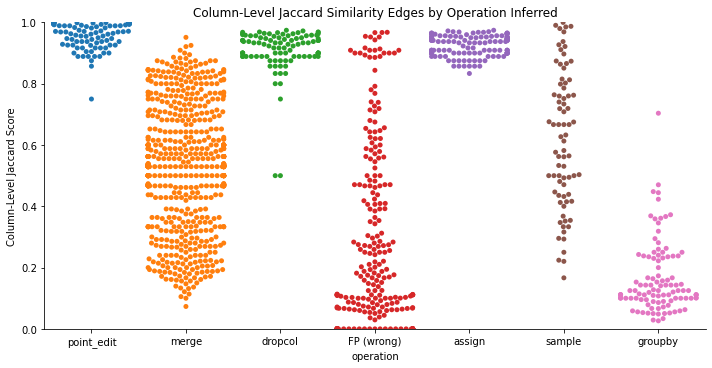

In [76]:
col_edges = all_results.loc[(all_results.metric == 'col') & (all_results.g_inferred == True) & (all_results.type == 'col')]

hue_order = ['point_edit', 'merge', 'dropcol', 'FP (wrong)', 'assign', 'sample', 'groupby']
import seaborn as sns
#cell_edges.plot.scatter('operation', 'weight')
col_plot_e = col_edges[['operation','weight', 'g_inferred', 'g_truth']].fillna('FP (wrong)')
#cell_plot_e
#f, ax = plt.subplots(figsize=(7, 3))
sns.catplot(x="operation", y="weight", data=col_plot_e, kind='swarm', aspect=2.0, order=hue_order)
plt.ylim(0,1.0)
plt.ylabel('Column-Level Jaccard Score')
plt.title('Column-Level Jaccard Similarity Edges by Operation Inferred')

In [86]:
col_plot_e.groupby('operation').count()

,weight,g_inferred,g_truth
operation,,,
FP (wrong),239,239,239
assign,136,136,136
dropcol,98,98,98
groupby,104,104,104
merge,657,657,657
point_edit,126,126,126
sample,77,77,77


In [385]:
cell_edges

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation
0,40.csv,0.csv,20200529-101018,pc2cell+join+group+transform+pivot,True,cell,0.999500,True,point_edit
9,40.csv,45.csv,20200529-101018,pc2cell+join+group+transform+pivot,True,cell,0.655172,True,merge
55,0.csv,2.csv,20200529-101018,pc2cell+join+group+transform+pivot,True,cell,0.999500,True,point_edit
56,0.csv,4.csv,20200529-101018,pc2cell+join+group+transform+pivot,True,cell,0.960000,True,nsmallest
111,2.csv,6.csv,20200529-101018,pc2cell+join+group+transform+pivot,True,cell,0.950000,True,dropcol
...,...,...,...,...,...,...,...,...,...
1369,31.csv,23.csv,20200529-101016,pc2cell+join+group+transform+pivot,True,cell,0.566000,True,nsmallest
1387,23.csv,24.csv,20200529-101016,pc2cell+join+group+transform+pivot,True,cell,0.421053,True,merge
1388,23.csv,32.csv,20200529-101016,pc2cell+join+group+transform+pivot,True,cell,0.350000,True,sample
1462,29.csv,30.csv,20200529-101016,pc2cell+join+group+transform+pivot,True,cell,0.261438,True,merge


In [88]:
cell_plot_e.groupby('operation').count()

,weight,g_inferred,g_truth
operation,,,
FP (wrong),402,402,402
assign,137,137,137
dropcol,98,98,98
groupby,43,43,43
merge,553,553,553
point_edit,126,126,126
sample,78,78,78


Text(0.5, 1.0, 'Cell-Level Jaccard Similarity Edges by Operation Inferred')

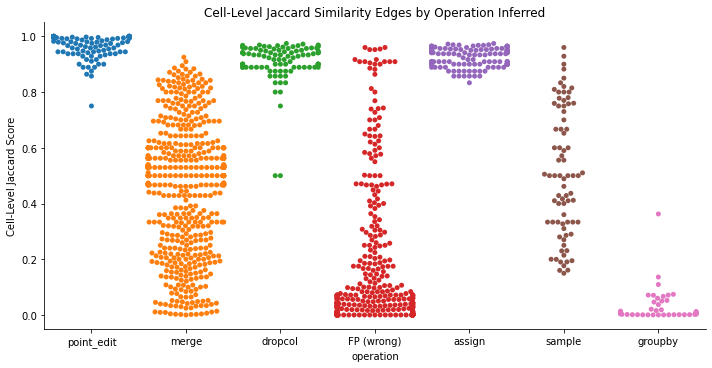

In [77]:
import seaborn as sns
#cell_edges.plot.scatter('operation', 'weight')
cell_edges = all_results.loc[(all_results.metric == 'cell') & (all_results.g_inferred == True) & (all_results.type == 'cell')]
cell_plot_e = cell_edges[['operation','weight', 'g_inferred', 'g_truth']].fillna('FP (wrong)')
#cell_plot_e
#f, ax = plt.subplots(figsize=(7, 3))
sns.catplot(x="operation", y="weight", data=cell_plot_e, kind='swarm', aspect=2.0, order=hue_order)
plt.ylabel('Cell-Level Jaccard Score')
plt.title('Cell-Level Jaccard Similarity Edges by Operation Inferred')

In [317]:
cell_dectector_results = qgrid_widget.get_changed_df()

In [424]:
all_detector_FP =  qgrid_widget.get_changed_df()
len(all_detector_FP.index)

64

In [336]:
cell_TN =  qgrid_widget.get_changed_df()
len(cell_TN.index)

64

In [337]:
cell_TN.groupby('operation').count()

,src,dest,notebook,metric,g_inferred,type,weight,g_truth
operation,,,,,,,,
groupby,26,26,26,26,26,0,0,26
iloc,7,7,7,7,7,0,0,7
merge,12,12,12,12,12,0,0,12
nlargest,2,2,2,2,2,0,0,2
nsmallest,4,4,4,4,4,0,0,4
pivot,12,12,12,12,12,0,0,12
sample,1,1,1,1,1,0,0,1


In [268]:
col_TP = 

In [878]:
pc2cell_TP = pc2edges.loc[(pc2edges.g_truth == True) & (pc2edges.g_inferred == True)]

In [879]:
col_TP = coledges.loc[(coledges.g_truth == True) & (coledges.g_inferred == True)]

In [880]:
col_TP.set_index(['notebook', 'src', 'dest'])

metric  g_inferred type    weight  g_truth  \
notebook        src    dest                                                
20200624-154834 29.csv 0.csv     col        True  col  0.999000     True   
                       46.csv    col        True  col  0.625000     True   
                0.csv  1.csv     col        True  col  0.909091     True   
                17.csv 2.csv     col        True  col  0.998905     True   
                2.csv  1.csv     col        True  col  0.830000     True   
...                              ...         ...  ...       ...      ...   
20200624-154807 18.csv 11.csv    col        True  col  0.100649     True   
                       17.csv    col        True  col  0.035714     True   
                7.csv  11.csv    col        True  col  0.444444     True   
                11.csv 16.csv    col        True  col  0.000000     True   
                1.csv  9.csv     col        True  col  0.333333     True   

                                operation stage_0     stage_1  stage_1_weight  \
notebook        src    dest                                                     
20200624-154834 29.csv 0.csv   point_edit   input  considered        0.997895   
                       46.csv       merge   input  considered        0.625000   
                0.csv  1.csv       assign   input  considered        0.909091   
                17.csv 2.csv   point_edit   input  considered        0.997439   
                2.csv  1.csv     nlargest   input  considered        0.866711   
...                                   ...     ...         ...             ...   
20200624-154807 18.csv 11.csv       merge   input  considered        0.727273   
                       17.csv       merge   input  considered        0.318182   
                7.csv  11.csv        iloc   input  considered        0.613715   
                11.csv 16.csv     groupby   input  considered        0.208333   
                1.csv  9.csv         iloc   input  considered        0.398850   

                              stage_1_op  ... stage_6_transform_weight  \
notebook        src    dest               ...                            
20200624-154834 29.csv 0.csv    selected  ...                      NaN   
                       46.csv   selected  ...                      NaN   
                0.csv  1.csv    selected  ...                      NaN   
                17.csv 2.csv    selected  ...                      NaN   
                2.csv  1.csv    selected  ...                      NaN   
...                                  ...  ...                      ...   
20200624-154807 18.csv 11.csv   selected  ...                      NaN   
                       17.csv   selected  ...                      NaN   
                7.csv  11.csv   selected  ...                      NaN   
                11.csv 16.csv   selected  ...                      NaN   
                1.csv  9.csv    selected  ...                      NaN   

                               stage_7_pivot stage_7_pivot_weight  \
notebook        src    dest                                         
20200624-154834 29.csv 0.csv             NaN                  NaN   
                       46.csv            NaN                  NaN   
                0.csv  1.csv             NaN                  NaN   
                17.csv 2.csv             NaN                  NaN   
                2.csv  1.csv             NaN                  NaN   
...                                      ...                  ...   
20200624-154807 18.csv 11.csv            NaN                  NaN   
                       17.csv            NaN                  NaN   
                7.csv  11.csv            NaN                  NaN   
                11.csv 16.csv            NaN                  NaN   
                1.csv  9.csv             NaN                  NaN   

                              stage_3_group_op  stage_2_inter_op  \
notebook        src    dest                               

In [881]:
col_TP_edges =  col_TP.set_index(['notebook', 'src', 'dest']).index

In [882]:
pc2cell_TP_edges = pc2cell_TP.set_index(['notebook', 'src', 'dest']).index

In [30]:
col_widget = qgrid.show_grid(col_TP, show_toolbar=True)
col_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [885]:
symmdiff_index_TP = col_TP_edges.difference(pc2cell_TP_edges)
symmdiff_index_TP

MultiIndex([('20200624-154808', '15.csv', '21.csv'),
            ('20200624-154810', '14.csv', '21.csv'),
            ('20200624-154811',  '7.csv', '10.csv'),
            ('20200624-154834',  '2.csv', '14.csv'),
            ('20200624-154834', '24.csv', '32.csv'),
            ('20200624-154834', '26.csv',  '3.csv'),
            ('20200624-154834', '35.csv', '43.csv'),
            ('20200624-154834',  '4.csv', '10.csv'),
            ('20200624-154834',  '8.csv',  '5.csv'),
            ('20200624-154835',  '2.csv', '21.csv'),
            ('20200624-154835', '29.csv', '46.csv'),
            ('20200624-154841', '29.csv', '39.csv'),
            ('20200624-154841', '44.csv', '30.csv'),
            ('20200624-154841',  '6.csv',  '1.csv'),
            ('20200624-154843',  '1.csv', '15.csv'),
            ('20200624-154843', '22.csv', '35.csv'),
            ('20200624-154843', '45.csv', '47.csv')],
           names=['notebook', 'src', 'dest'])

In [894]:
col_TP.set_index(['notebook', 'src', 'dest']).loc(symmdiff_index_TP)

TypeError: unhashable type: 'MultiIndex'

In [895]:
indexed_col_TP = col_TP.set_index(['notebook', 'src', 'dest'])
indexed_col_TP = indexed_col_TP.reindex(symmdiff_index_TP)
#TP_operations = indexed_col_TP.loc[~indexed_col_TP.operation.isna()]
#missed_merges = TP_operations.loc[TP_operations.operation == 'merge']
indexed_col_TP
#symmdiff_index_TP.get_locs()

metric  g_inferred type    weight  g_truth  \
notebook        src    dest                                                
20200624-154808 15.csv 21.csv    col        True  col  0.008217     True   
20200624-154810 14.csv 21.csv    col        True  col  0.006173     True   
20200624-154811 7.csv  10.csv    col        True  col  0.006367     True   
20200624-154834 2.csv  14.csv    col        True  col  0.028889     True   
                24.csv 32.csv    col        True  col  0.000000     True   
                26.csv 3.csv     col        True  col  0.005690     True   
                35.csv 43.csv    col        True  col  0.007500     True   
                4.csv  10.csv    col        True  col  0.000000     True   
                8.csv  5.csv     col        True  col  0.000000     True   
20200624-154835 2.csv  21.csv    col        True  col  0.011878     True   
                29.csv 46.csv    col        True  col  0.875000     True   
20200624-154841 29.csv 39.csv    col        True  col  0.952381     True   
                44.csv 30.csv    col        True  col  0.952381     True   
                6.csv  1.csv     col        True  col  0.032749     True   
20200624-154843 1.csv  15.csv    col        True  col  0.231707     True   
                22.csv 35.csv    col        True  col  0.000000     True   
                45.csv 47.csv    col        True  col  0.037037     True   

                              operation stage_0     stage_1  stage_1_weight  \
notebook        src    dest                                                   
20200624-154808 15.csv 21.csv     merge   input  considered        0.578947   
20200624-154810 14.csv 21.csv     merge   input  considered        0.582442   
20200624-154811 7.csv  10.csv     merge   input  considered        0.760000   
20200624-154834 2.csv  14.csv     merge   input  considered        0.611111   
                24.csv 32.csv   groupby   input  considered        0.135417   
                26.csv 3.csv      merge   input  considered        0.578947   
                35.csv 43.csv     merge   input  considered        0.562500   
                4.csv  10.csv     merge   input  considered        0.611111   
                8.csv  5.csv      merge   input  considered        0.600000   
20200624-154835 2.csv  21.csv     merge   input  considered        0.529412   
                29.csv 46.csv   dropcol   input  considered        0.875000   
20200624-154841 29.csv 39.csv    assign   input  considered        0.952381   
                44.csv 30.csv    assign   input  considered        0.952381   
                6.csv  1.csv      merge   input  considered        0.740741   
20200624-154843 1.csv  15.csv      iloc   input  considered        0.758014   
                22.csv 35.csv     merge   input  considered        0.740741   
                45.csv 47.csv     merge   input  considered        0.703704   

                              stage_1_op  ... stage_6_transform_weight  \
notebook        src    dest               ...                            
20200624-154808 15.csv 21.csv   selected  ...                      NaN   
20200624-154810 14.csv 21.csv   selected  ...                      NaN   
20200624-154811 7.csv  10.csv   selected  ...                      NaN   
20200624-154834 2.csv  14.csv   selected  ...                      NaN   
                24.csv 32.csv   selected  ...                      NaN   
                26.csv 3.csv    selected  ...                      NaN   
                35.csv 43.csv   selected  ...                      NaN   
                4.csv  10.csv   selected  ...                      NaN   
                8.csv  5.csv    selected  ...                      NaN   
20200624-154835 2.csv  21.csv   selected  ...                      NaN   
                29.csv 46.csv   selected  ...                      NaN   
20200624-154841 29.csv 39.csv   selected  ...                      NaN   
                44.csv 30.csv   selected  ...  

In [897]:
indexed_pc2edges = pc2edges.set_index(['notebook', 'src', 'dest'])
indexed_pc2edges = indexed_pc2edges.reindex(symmdiff_index_TP)
#TP_operations = indexed_col_TP.loc[~indexed_col_TP.operation.isna()]
#missed_merges = TP_operations.loc[TP_operations.operation == 'merge']
qgrid_widget = qgrid.show_grid(indexed_pc2edges, show_toolbar=True)
qgrid_widget
#symmdiff_index_TP.get_locs()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [190]:
TP_operations.groupby('operation').count()

,metric,g_inferred,type,weight,g_truth
operation,,,,,
groupby,8,8,8,8,8
iloc,3,3,3,3,3
merge,12,12,12,12,12


In [6]:

#for nb, src, dest in missed_merges.index:
#    g = get_stage_graph(nb, 'pc2cell+join+group+transform+pivot')
#    print(nb, src, dest, g[src][dest])


In [173]:
g = get_stage_graph('20200529-101016', 'pc2cell+join+group+transform+pivot')
g['10.csv']['17.csv']

{'weight': 0.016581632653061226,
 'stage_0': 'input',
 'stage_2_inter': 'considered',
 'stage_2_inter_result': 'TN',
 'stage_4_join': 'considered',
 'stage_4_join_result': 'TN'}

In [81]:
import plotly


grouped_by_op = all_results.fillna('Error').groupby(['stage1','stage2', 'stage3']).count().reset_index()
fig = genSankey(grouped_by_op, cat_cols=['stage1','stage2', 'stage3'], value_cols='weight')
plotly.offline.plot(fig, validate=False)


'temp-plot.html'

In [82]:
grouped_by_op

,stage1,stage2,stage3,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation
0,cell_level_input,cell_detector,FN,6411,6411,6411,6411,6411,6411,6411,6411,6411
1,cell_level_input,cell_detector,FP,25,25,25,25,25,25,25,25,25
2,cell_level_input,cell_detector,TN,86,86,86,86,86,86,86,86,86
3,cell_level_input,cell_detector,TP,192,192,192,192,192,192,192,192,192


In [419]:
#Cell Level Edges:
cell_edges = all_results.loc[(all_results.type == 'cell')]
cell_edges.sort_values('weight')

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation
1450,36.csv,13.csv,20200529-101019,cell+group+join+transform+pivot,True,cell,0.100091,False,NaN
1260,18.csv,23.csv,20200529-101015,cell+group+join+transform+pivot,True,cell,0.102564,True,iloc
205,31.csv,34.csv,20200529-101015,cell+group+join+transform+pivot,True,cell,0.111111,False,NaN
81,7.csv,5.csv,20200601-152549,cell+group+join+transform+pivot,True,cell,0.130653,False,NaN
1259,18.csv,26.csv,20200529-101015,cell+group+join+transform+pivot,True,cell,0.132666,False,NaN
...,...,...,...,...,...,...,...,...,...
265,38.csv,42.csv,20200529-101019,cell+group+join+transform+pivot,True,cell,0.999825,True,point_edit
0,11.csv,0.csv,20200529-101016,cell+group+join+transform+pivot,True,cell,0.999900,True,point_edit
110,9.csv,10.csv,20200529-101019,cell+group+join+transform+pivot,True,cell,0.999947,True,point_edit
109,9.csv,7.csv,20200529-101019,cell+group+join+transform+pivot,True,cell,0.999947,True,point_edit


In [420]:
# Pivots

In [423]:
pivot_edges = all_results.loc[(all_results.type == 'pivot') &  (all_results.g_truth == False)]
pivot_edges

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation
76,0.csv,41.csv,20200529-101018,cell+group+join+transform+pivot,True,pivot,1.0,False,NaN
93,0.csv,14.csv,20200529-101018,cell+group+join+transform+pivot,True,pivot,1.0,False,NaN
485,7.csv,27.csv,20200529-101018,cell+group+join+transform+pivot,True,pivot,1.0,False,NaN
178,2.csv,17.csv,20200601-152549,cell+group+join+transform+pivot,True,pivot,1.0,False,NaN
739,28.csv,32.csv,20200529-101015,cell+group+join+transform+pivot,True,pivot,1.0,False,NaN
395,29.csv,20.csv,20200529-101019,cell+group+join+transform+pivot,True,pivot,1.0,False,NaN
500,21.csv,25.csv,20200529-101016,cell+group+join+transform+pivot,True,pivot,1.0,False,NaN
1395,23.csv,53.csv,20200529-101016,cell+group+join+transform+pivot,True,pivot,1.0,False,NaN
1525,44.csv,41.csv,20200529-101016,cell+group+join+transform+pivot,True,pivot,1.0,False,NaN


In [422]:
pivot_edges = all_results.loc[(all_results.operation == 'pivot') & (all_results.g_inferred == False)]
pivot_edges

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation
22,40.csv,41.csv,20200529-101018,cell+group+join+transform+pivot,False,NaN,NaN,True,pivot
146,2.csv,14.csv,20200529-101018,cell+group+join+transform+pivot,False,NaN,NaN,True,pivot
1146,20.csv,27.csv,20200529-101018,cell+group+join+transform+pivot,False,NaN,NaN,True,pivot
152,0.csv,2.csv,20200601-152549,cell+group+join+transform+pivot,False,NaN,NaN,True,pivot
344,20.csv,7.csv,20200529-101015,cell+group+join+transform+pivot,False,NaN,NaN,True,pivot
774,30.csv,32.csv,20200529-101015,cell+group+join+transform+pivot,False,NaN,NaN,True,pivot
417,25.csv,23.csv,20200529-101019,cell+group+join+transform+pivot,False,NaN,NaN,True,pivot
1126,16.csv,25.csv,20200529-101016,cell+group+join+transform+pivot,False,NaN,NaN,True,pivot
1526,44.csv,53.csv,20200529-101016,cell+group+join+transform+pivot,False,NaN,NaN,True,pivot


In [ ]:
# GroupBys

In [61]:
group_edges = all_results.loc[(all_results.type == 'groupby') & (all_results.g_truth == False)]
group_edges

,src,dest,notebook,metric,g_inferred,g_truth,stage_0,type,weight,stage_1,...,stage_4_join_weight,stage_5_pivot,stage_5_pivot_weight,stage_1_intra,stage_1_intra_weight,stage_1_intra_op,stage_4_join_op,stage_2_inter_op,stage_3_group_op,stage_5_pivot_op
136,8.csv,12.csv,20200720-111846,pc2cellcoltimestamp+group+join+pivot,True,False,input,groupby,6.000000,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,selected,NaN
1568,47.csv,36.csv,20200720-111937,pc2cellcoltimestamp+group+join+pivot,True,False,input,groupby,2.153846,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1798,36.csv,42.csv,20200720-111937,pc2cellcoltimestamp+group+join+pivot,True,False,input,groupby,2.666667,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,17.csv,35.csv,20200720-111947,pc2cellcoltimestamp+group+join+pivot,True,False,input,groupby,2.882353,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
group_edges = all_results.loc[(all_results.operation == 'groupby') & (all_results.g_inferred == False)]
group_edges

,src,dest,notebook,metric,g_inferred,g_truth,stage_0,type,weight,stage_1,...,stage_4_join_weight,stage_5_pivot,stage_5_pivot_weight,stage_1_intra,stage_1_intra_weight,stage_1_intra_op,stage_4_join_op,stage_2_inter_op,stage_3_group_op,stage_5_pivot_op
248,15.csv,1.csv,20200720-111913,col,False,True,input,NaN,NaN,considered,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
659,53.csv,35.csv,20200720-111913,col,False,True,input,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
803,40.csv,38.csv,20200720-111913,col,False,True,input,NaN,NaN,considered,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,56.csv,59.csv,20200720-111913,col,False,True,input,NaN,NaN,considered,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1366,22.csv,27.csv,20200720-111913,col,False,True,input,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,0.csv,1.csv,20200720-111907,cell,False,True,input,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2071,60.csv,54.csv,20200720-111907,cell,False,True,input,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,7.csv,6.csv,20200720-111849,col,False,True,input,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,7.csv,6.csv,20200720-111849,cell,False,True,input,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Merges

In [439]:
merge_edges = all_results.loc[(all_results.type == 'merge') & (all_results.g_truth == False)]
merge_edges

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation
1185,44.csv,50.csv,20200529-101018,cell+group+join+transform+pivot,True,merge,1.6,False,NaN


In [428]:
merge_edges = all_results.loc[(all_results.operation == 'merge') & (all_results.g_inferred == False)]
merge_edges

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation
840,16.csv,22.csv,20200529-101018,cell+group+join+transform+pivot,False,NaN,NaN,True,merge
114,11.csv,17.csv,20200601-152549,cell+group+join+transform+pivot,False,NaN,NaN,True,merge
114,45.csv,43.csv,20200529-101015,cell+group+join+transform+pivot,False,NaN,NaN,True,merge
680,22.csv,26.csv,20200529-101015,cell+group+join+transform+pivot,False,NaN,NaN,True,merge
24,5.csv,0.csv,20200529-101010,cell+group+join+transform+pivot,False,NaN,NaN,True,merge
29,5.csv,16.csv,20200529-101010,cell+group+join+transform+pivot,False,NaN,NaN,True,merge
123,4.csv,6.csv,20200529-101011,cell+group+join+transform+pivot,False,NaN,NaN,True,merge
920,1.csv,12.csv,20200529-101019,cell+group+join+transform+pivot,False,NaN,NaN,True,merge
1353,24.csv,22.csv,20200529-101019,cell+group+join+transform+pivot,False,NaN,NaN,True,merge
419,45.csv,50.csv,20200529-101016,cell+group+join+transform+pivot,False,NaN,NaN,True,merge


In [429]:
df = all_results.fillna('Error').groupby(['operation','type','g_inferred','g_truth']).count()[['weight']]
df
#nppo_operations = df.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(('weight'), ascending=False)).rename(columns={'weight':'count'})
##nppo_operations.loc['Error']

weight
operation  type    g_inferred g_truth        
Error      Error   False      False      6376
           cell    True       False        25
           groupby True       False        25
           merge   True       False         1
           pivot   True       False         9
assign     cell    True       True         22
dropcol    cell    True       True         22
groupby    Error   False      True         21
           groupby True       True          6
iloc       Error   False      True          9
           cell    True       True         14
           groupby True       True          1
merge      Error   False      True         11
           cell    True       True         34
           groupby True       True          5
nlargest   Error   False      True          2
           cell    True       True         28
nsmallest  Error   False      True          4
           cell    True       True         25
           merge   True       True          1
pivot      Error   False      True          9
           pivot   True       True         15
point_edit cell    True       True         22
sample     Error   False      True          3
           cell    True       True         24

In [187]:
df = edge_results.fillna('Error').groupby(['type','g_truth']).count()[['weight']]
df
#nppo_operations = df.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(('weight'), ascending=False)).rename(columns={'weight':'count'})
#nppo_operations.loc['Error']

weight
type    g_truth        
cell    False        18
        True        158
groupby False        12
        True          8
join    False        14
        True         24
pivot   False         7
        True          4

# Scoring Missing Edges

In [430]:
import nppo
from tqdm.auto import tqdm

def find_missing_scores(RESULT_DIR, df):
    
    df = df.sort_values('notebook')
    
    func_dict = {
    'pivot' : nppo.pivot_detector,
    'groupby': nppo.df_groupby_check_new
    }

    previous_notebook = None
    for index, row in tqdm(df.iterrows(), total=len(df.index)):
        if row['notebook'] != previous_notebook:
            df_dict = similarity.load_dataset_dir(RESULT_DIR+row['notebook']+'/artifacts/', '*.csv', index_col=0)
            previous_notebook = row['notebook']
        
        if row['operation'] in func_dict:
            df.loc[index,'score'] = func_dict[row['operation']](row['src'], row['dest'], df_dict, None)
        else:
            df.loc[index,'score'] = None
    
    return df
    

In [432]:
df = all_results.loc[(all_results.operation == 'groupby')].reset_index(drop=True)

group_scores = find_missing_scores(RESULT_DIR,df)
group_scores

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation,score
14,1.csv,0.csv,20200529-101010,cell+group+join+transform+pivot,True,groupby,1.0,True,groupby,1.000000
18,12.csv,14.csv,20200529-101011,cell+group+join+transform+pivot,False,NaN,NaN,True,groupby,1.000000
17,0.csv,17.csv,20200529-101011,cell+group+join+transform+pivot,False,NaN,NaN,True,groupby,1.000000
16,10.csv,11.csv,20200529-101011,cell+group+join+transform+pivot,False,NaN,NaN,True,groupby,0.129032
15,2.csv,19.csv,20200529-101011,cell+group+join+transform+pivot,False,NaN,NaN,True,groupby,1.000000
13,12.csv,47.csv,20200529-101015,cell+group+join+transform+pivot,False,NaN,NaN,True,groupby,1.000000
8,0.csv,12.csv,20200529-101015,cell+group+join+transform+pivot,False,NaN,NaN,True,groupby,0.215054
9,27.csv,34.csv,20200529-101015,cell+group+join+transform+pivot,False,NaN,NaN,True,groupby,1.000000
10,2.csv,7.csv,20200529-101015,cell+group+join+transform+pivot,False,NaN,NaN,True,groupby,0.328358
11,5.csv,6.csv,20200529-101015,cell+group+join+transform+pivot,False,NaN,NaN,True,groupby,0.307692


In [433]:
df = all_results.loc[(all_results.operation == 'pivot')].reset_index(drop=True)

pivot_scores = find_missing_scores(RESULT_DIR,df)
pivot_scores

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation,score
14,3.csv,11.csv,20200529-101010,cell+group+join+transform+pivot,True,pivot,1.0,True,pivot,1.000000
13,4.csv,8.csv,20200529-101010,cell+group+join+transform+pivot,True,pivot,1.0,True,pivot,1.000000
15,11.csv,16.csv,20200529-101011,cell+group+join+transform+pivot,True,pivot,1.0,True,pivot,1.000000
11,17.csv,24.csv,20200529-101015,cell+group+join+transform+pivot,True,pivot,1.0,True,pivot,1.000000
12,35.csv,41.csv,20200529-101015,cell+group+join+transform+pivot,True,pivot,1.0,True,pivot,1.000000
7,8.csv,6.csv,20200529-101015,cell+group+join+transform+pivot,True,pivot,1.0,True,pivot,1.000000
8,20.csv,7.csv,20200529-101015,cell+group+join+transform+pivot,False,NaN,NaN,True,pivot,1.000000
9,5.csv,13.csv,20200529-101015,cell+group+join+transform+pivot,True,pivot,1.0,True,pivot,1.000000
10,30.csv,32.csv,20200529-101015,cell+group+join+transform+pivot,False,NaN,NaN,True,pivot,1.000000
21,21.csv,47.csv,20200529-101016,cell+group+join+transform+pivot,True,pivot,1.0,True,pivot,1.000000


In [296]:
pivot_scores.loc[group_scores.g_inferred == False]

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation,score
13,3.csv,11.csv,20200529-101010,pc2cellcol+group+join+transform+pivot,True,pivot,1.0,True,pivot,1.0
12,4.csv,8.csv,20200529-101010,pc2cellcol+group+join+transform+pivot,True,pivot,1.0,True,pivot,1.0
6,8.csv,6.csv,20200529-101015,pc2cellcol+group+join+transform+pivot,True,pivot,1.0,True,pivot,1.0
7,20.csv,7.csv,20200529-101015,pc2cellcol+group+join+transform+pivot,False,NaN,NaN,True,pivot,1.0
8,5.csv,13.csv,20200529-101015,pc2cellcol+group+join+transform+pivot,True,pivot,1.0,True,pivot,1.0
9,30.csv,32.csv,20200529-101015,pc2cellcol+group+join+transform+pivot,False,NaN,NaN,True,pivot,1.0
10,17.csv,24.csv,20200529-101015,pc2cellcol+group+join+transform+pivot,True,pivot,1.0,True,pivot,1.0
20,21.csv,47.csv,20200529-101016,pc2cellcol+group+join+transform+pivot,False,NaN,NaN,True,pivot,1.0
21,16.csv,25.csv,20200529-101016,pc2cellcol+group+join+transform+pivot,False,NaN,NaN,True,pivot,1.0
22,44.csv,53.csv,20200529-101016,pc2cellcol+group+join+transform+pivot,False,NaN,NaN,True,pivot,1.0


In [214]:
scored_results = find_missing_scores(RESULT_DIR, results)
scored_results

,src,dest,notebook,metric,g_inferred,operation,type,weight,score
19,15.csv,19.csv,20200517-200522,pc2cell+join+group+transform+pivot,True,point_edit,cell,0.998437,NaN
18,14.csv,16.csv,20200517-200522,pc2cell+join+group+transform+pivot,False,pivot,NaN,NaN,7.000000
0,0.csv,1.csv,20200517-200522,pc2cell+join+group+transform+pivot,True,point_edit,cell,0.999000,NaN
1,0.csv,3.csv,20200517-200522,pc2cell+join+group+transform+pivot,True,nsmallest,cell,0.600000,NaN
2,0.csv,7.csv,20200517-200522,pc2cell+join+group+transform+pivot,True,groupby,col,0.787778,0.431649
...,...,...,...,...,...,...,...,...,...
29,19.csv,55.csv,20200517-201542,pc2cell+join+group+transform+pivot,False,dropcol,NaN,NaN,NaN
28,17.csv,42.csv,20200517-201542,pc2cell+join+group+transform+pivot,True,dropcol,cell,0.923077,NaN
27,16.csv,37.csv,20200517-201542,pc2cell+join+group+transform+pivot,False,pivot,NaN,NaN,0.250000
37,25.csv,35.csv,20200517-201542,pc2cell+join+group+transform+pivot,False,groupby,NaN,NaN,1.000319


In [209]:
func_dict = {
    'pivot' : nppo.pivot_detector,
    'groupby': nppo.df_groupby_check_new
}

'point_edit' in func_dict

False

In [216]:
scored_results.to_csv('nppo_scores_20200522.csv')

In [57]:
def inspect_dataframes(df, ix):
    df_dict = similarity.load_dataset_dir(RESULT_DIR+df.loc[ix]['notebook']+'/artifacts/', '*.csv', index_col=0)
    display(df_dict[df.loc[ix]['src']])
    display(df_dict[df.loc[ix]['dest']])
    return df_dict[df.loc[ix]['src']], df_dict[df.loc[ix]['dest']]


def get_variables(df,ix):
    df_dict = similarity.load_dataset_dir(RESULT_DIR+df.loc[ix]['notebook']+'/artifacts/', '*.csv', index_col=0)
    return df.loc[ix]['src'], df.loc[ix]['dest'], df_dict
    

In [145]:
df1, df2 = inspect_dataframes(cell_edges, 32)


,credit_card_number,ascii_safe_email,ipv6,century,military_state,language_code,last_name_male,randomize_nb_elements__x,slug,zipcode_in_state,...,unix_device,suffix,day_of_week,job,randomize_nb_elements__y,mac_platform_token,credit_card_full,mime_type,url,random_int__log4
11,2720286864179478,adam35@example.net,1d7:80e6:5ec3:dbba:9dc6:80ad:c305:a2a9,XV,AA,mn,Warner,6.0,blood-among,60236,...,/dev/vdu,MD,Monday,Counsellor,10.0,Macintosh; Intel Mac OS X 10_7_3,VISA 19 digit\nMark Briggs\n429434966369175706...,text/xml,http://www.lopez-hicks.com/,9.186969
29,6577066158600230,joshua46@example.com,ffa2:59c3:f791:c02b:e17a:5e6c:69ff:1881,X,AA,hsb,Cohen,8.0,financial-protect,19893,...,/dev/sdv,PhD,Sunday,Chief of Staff,7.0,Macintosh; U; PPC Mac OS X 10_11_5,VISA 13 digit\nMark Williams\n4847198123242 04...,audio/L24,https://webb-smith.com/,9.097396
3,30281225928084,pamelaryan@example.net,bf4b:9dca:9f76:87bd:42d2:f3af:cd8:e8e7,XII,AE,sw,Mitchell,6.0,vote-they-accept,98691,...,/dev/xvdl,MD,Friday,"Education officer, community",10.0,Macintosh; PPC Mac OS X 10_12_0,VISA 19 digit\nAmber Mcdaniel\n494125282174458...,multipart/mixed,https://www.thomas.com/,9.093469
23,503888540328,christophercline@example.com,1092:da3f:9a49:4fca:c896:4533:60f0:92fa,XIII,AE,br,Patterson,8.0,officer-public,37349,...,/dev/vdk,DDS,Wednesday,Bookseller,9.0,Macintosh; Intel Mac OS X 10_6_6,Diners Club / Carte Blanche\nRobert Perkins\n3...,message/http,http://www.perez-callahan.org/,9.092682
53,3535797171249500,carloswade@example.com,3333:6f6:adf2:9264:1eb2:b2b4:fe81:e253,XVII,AP,ko,Young,10.0,traditional-various,68088,...,/dev/vdl,PhD,Tuesday,"Designer, jewellery",7.0,Macintosh; U; PPC Mac OS X 10_6_3,Diners Club / Carte Blanche\nColin Walsh\n3047...,image/svg+xml,https://www.howell.net/,9.067970
42,4720572210254233879,tracilopez@example.net,7844:6c5b:a7c8:ea0f:ae13:8eff:7ab5:e116,XIX,AE,ff,Jenkins,9.0,trip-view-history,42565,...,/dev/sdd,MD,Sunday,"Journalist, magazine",7.0,Macintosh; PPC Mac OS X 10_8_3,Maestro\nTimothy Wilson\n573410271296 08/20\nC...,application/rss+xml,https://shaw.com/,8.972083
17,5402789005173720,tonya05@example.net,4e30:3b42:ba9c:dc1b:699f:adb1:a27c:b4bc,XXI,AE,shs,Armstrong,7.0,firm-provide-start,89411,...,/dev/vdp,DVM,Monday,Ship broker,13.0,Macintosh; Intel Mac OS X 10_11_7,JCB 16 digit\nOscar Reed\n3519255885713105 10/...,application/zip,https://www.wells.com/,8.948846
37,6011052845738041,greenjennifer@example.net,8e10:d3c3:f2bc:5f2f:6a09:c59:2d0f:37a3,XX,AP,cy,Jones,9.0,cell-bring-end-wish,63771,...,/dev/sdm,MD,Sunday,Garment/textile technologist,7.0,Macintosh; U; PPC Mac OS X 10_7_2,VISA 16 digit\nAndrea Brown\n4526128572364962 ...,multipart/mixed,http://www.rogers.net/,8.906664
47,5247855284534780,kristin98@example.org,7b1b:a4b0:b45a:f26f:aa00:87cc:145f:167f,XIV,AE,bem,Hayes,10.0,test-about-weight,20030,...,/dev/xvdq,Jr.,Saturday,Secretary/administrator,7.0,Macintosh; PPC Mac OS X 10_8_2,Mastercard\nSavannah Rivera\n2477533412854614 ...,model/vrml,https://miller-paul.net/,8.903272
52,576356953850,dennisbrown@example.com,492e:c3a4:3999:c90f:44fc:e78c:1c35:216d,IX,AA,iu,Jennings,10.0,help-who-billion,99557,...,/dev/sdj,MD,Friday,Land,12.0,Macintosh; U; PPC Mac OS X 10_5_8,VISA 19 digit\nDavid Boyer\n449577501434577236...,message/rfc822,http://bell.com/,8.900549


,credit_card_number,ascii_safe_email,ipv6,century,military_state,language_code,last_name_male,randomize_nb_elements__x,slug,zipcode_in_state,...,rgb_color,unix_device,suffix,day_of_week,job,randomize_nb_elements__y,mac_platform_token,credit_card_full,mime_type,url
11,2720286864179478,adam35@example.net,1d7:80e6:5ec3:dbba:9dc6:80ad:c305:a2a9,XV,AA,mn,Warner,6.0,blood-among,60236,...,"35,239,224",/dev/vdu,MD,Monday,Counsellor,10.0,Macintosh; Intel Mac OS X 10_7_3,VISA 19 digit\nMark Briggs\n429434966369175706...,text/xml,http://www.lopez-hicks.com/
29,6577066158600230,joshua46@example.com,ffa2:59c3:f791:c02b:e17a:5e6c:69ff:1881,X,AA,hsb,Cohen,8.0,financial-protect,19893,...,"88,209,159",/dev/sdv,PhD,Sunday,Chief of Staff,7.0,Macintosh; U; PPC Mac OS X 10_11_5,VISA 13 digit\nMark Williams\n4847198123242 04...,audio/L24,https://webb-smith.com/
3,30281225928084,pamelaryan@example.net,bf4b:9dca:9f76:87bd:42d2:f3af:cd8:e8e7,XII,AE,sw,Mitchell,6.0,vote-they-accept,98691,...,"138,152,172",/dev/xvdl,MD,Friday,"Education officer, community",10.0,Macintosh; PPC Mac OS X 10_12_0,VISA 19 digit\nAmber Mcdaniel\n494125282174458...,multipart/mixed,https://www.thomas.com/
23,503888540328,christophercline@example.com,1092:da3f:9a49:4fca:c896:4533:60f0:92fa,XIII,AE,br,Patterson,8.0,officer-public,37349,...,"10,48,240",/dev/vdk,DDS,Wednesday,Bookseller,9.0,Macintosh; Intel Mac OS X 10_6_6,Diners Club / Carte Blanche\nRobert Perkins\n3...,message/http,http://www.perez-callahan.org/
53,3535797171249500,carloswade@example.com,3333:6f6:adf2:9264:1eb2:b2b4:fe81:e253,XVII,AP,ko,Young,10.0,traditional-various,68088,...,"62,229,169",/dev/vdl,PhD,Tuesday,"Designer, jewellery",7.0,Macintosh; U; PPC Mac OS X 10_6_3,Diners Club / Carte Blanche\nColin Walsh\n3047...,image/svg+xml,https://www.howell.net/
42,4720572210254233879,tracilopez@example.net,7844:6c5b:a7c8:ea0f:ae13:8eff:7ab5:e116,XIX,AE,ff,Jenkins,9.0,trip-view-history,42565,...,"98,210,168",/dev/sdd,MD,Sunday,"Journalist, magazine",7.0,Macintosh; PPC Mac OS X 10_8_3,Maestro\nTimothy Wilson\n573410271296 08/20\nC...,application/rss+xml,https://shaw.com/
17,5402789005173720,tonya05@example.net,4e30:3b42:ba9c:dc1b:699f:adb1:a27c:b4bc,XXI,AE,shs,Armstrong,7.0,firm-provide-start,89411,...,"17,108,144",/dev/vdp,DVM,Monday,Ship broker,13.0,Macintosh; Intel Mac OS X 10_11_7,JCB 16 digit\nOscar Reed\n3519255885713105 10/...,application/zip,https://www.wells.com/
37,6011052845738041,greenjennifer@example.net,8e10:d3c3:f2bc:5f2f:6a09:c59:2d0f:37a3,XX,AP,cy,Jones,9.0,cell-bring-end-wish,63771,...,"149,20,192",/dev/sdm,MD,Sunday,Garment/textile technologist,7.0,Macintosh; U; PPC Mac OS X 10_7_2,VISA 16 digit\nAndrea Brown\n4526128572364962 ...,multipart/mixed,http://www.rogers.net/
47,5247855284534780,kristin98@example.org,7b1b:a4b0:b45a:f26f:aa00:87cc:145f:167f,XIV,AE,bem,Hayes,10.0,test-about-weight,20030,...,"34,17,11",/dev/xvdq,Jr.,Saturday,Secretary/administrator,7.0,Macintosh; PPC Mac OS X 10_8_2,Mastercard\nSavannah Rivera\n2477533412854614 ...,model/vrml,https://miller-paul.net/
52,576356953850,dennisbrown@example.com,492e:c3a4:3999:c90f:44fc:e78c:1c35:216d,IX,AA,iu,Jennings,10.0,help-who-billion,99557,...,"57,135,112",/dev/sdj,MD,Friday,Land,12.0,Macintosh; U; PPC Mac OS X 10_5_8,VISA 19 digit\nDavid Boyer\n449577501434577236...,message/rfc822,http://bell.com/


In [126]:
import nppo
df1,df2,df_dict=get_variables(group_scores, 23)
nppo.df_groupby_check_new(df1,df2,df_dict,None,debug=True)

final_val = (1.0 * len(group_cols) * group_keyness_ratio) - missing_vals
16.0  =  (1.0 * 17 * 1.0 )- 1.0


16.0

In [87]:
nppo.df_groupby_check_new('10.csv','20.csv',df_dict,None,debug=True)

final_val = (1.0 * len(group_cols) * group_keyness_ratio) - missing_vals
16.0  =  (1.0 * 17 * 1.0 )- 1.0


16.0

In [45]:
df1,df2

('25.csv', '27.csv')

[Text(0, 0, "('cell', 'point_edit')"),
 Text(0, 0, "('cell', 'dropcol')"),
 Text(0, 0, "('cell', 'sample')"),
 Text(0, 0, "('cell', 'assign')"),
 Text(0, 0, "('cell', 'nlargest')"),
 Text(0, 0, "('cell', 'nsmallest')"),
 Text(0, 0, "('cell', 'Error')"),
 Text(0, 0, "('cell', 'iloc')"),
 Text(0, 0, "('cell', 'merge')"),
 Text(0, 0, "('cell', 'groupby')"),
 Text(0, 0, "('col', 'merge')"),
 Text(0, 0, "('col', 'Error')"),
 Text(0, 0, "('col', 'groupby')"),
 Text(0, 0, "('col', 'iloc')"),
 Text(0, 0, "('col', 'sample')"),
 Text(0, 0, "('groupby', 'Error')"),
 Text(0, 0, "('groupby', 'iloc')"),
 Text(0, 0, "('groupby', 'groupby')"),
 Text(0, 0, "('pivot', 'Error')"),
 Text(0, 0, "('pivot', 'pivot')"),
 Text(0, 0, "('pivot', 'groupby')"),
 Text(0, 0, "('transform', 'Error')")]

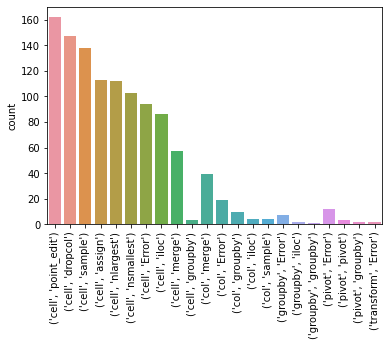

In [84]:



import seaborn as sns

chart=sns.barplot(x=nppo_operations.index, y='count', data=nppo_operations)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


In [16]:
cond = (results.metric== 'cell+group+join') & (results.g_truth == False) 
results.loc[cond].sort_values('weight', ascending=False)

,src,dest,notebook,metric,g_truth,type,weight,operation
4,noncacontribs.csv,contribs.csv,prop64,cell+group+join,False,groupby,10.574650,NaN
1,v17.csv,v12.csv,retail,cell+group+join,False,cell,0.755102,NaN
6,v16.csv,v11-R.csv,retail,cell+group+join,False,cell,0.755102,NaN
8,v18.csv,v13.csv,retail,cell+group+join,False,cell,0.755102,NaN
4,v12.csv,v8.csv,retail,cell+group+join,False,cell,0.675676,NaN
10,v13.csv,v9.csv,retail,cell+group+join,False,cell,0.675676,NaN
19,v7.csv,v11-R.csv,retail,cell+group+join,False,cell,0.675676,NaN
12,v9.csv,v4.csv,retail,cell+group+join,False,cell,0.520000,NaN
14,v8.csv,v3.csv,retail,cell+group+join,False,cell,0.520000,NaN
1,support.csv,noncacontribs.csv,prop64,cell+group+join,False,cell,0.191026,NaN


In [7]:
from lineage import graphs

In [127]:
nb = '20200527-100507'
#nb = pivot_edges.loc[4]['notebook']
#graphs.draw_interactive_graph(RESULT_DIR,nb,metric='cell+join+group+transform+pivot').show(nb+'.html')
graphs.draw_graph(RESULT_DIR, nb)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [110]:
pivot_edges.loc[4]

src                                   40.csv
dest                                  45.csv
notebook                     20200525-163637
metric       cell+join+group+transform+pivot
g_truth                                False
type                                   pivot
weight                                     1
operation                                NaN
Name: 4, dtype: object

In [434]:
from sklearn.metrics import confusion_matrix

confusion_matrix(all_results.g_truth, all_results.g_inferred)

array([[6376,   60],
       [  59,  219]])

In [248]:
row = group_edges.iloc[3]
row

src                                          23.csv
dest                                         22.csv
notebook                            20200529-101013
metric        pc2cellcol+group+join+transform+pivot
g_inferred                                     True
type                                        groupby
weight                                      5.37736
g_truth                                       False
operation                                       NaN
Name: 273, dtype: object

In [319]:
import numpy as np


def edges_away(RESULT_DIR, row):
    #df_dict = similarity.load_dataset_dir(RESULT_DIR+row['notebook']+'/artifacts/', '*.csv', index_col=0)
    g_truth = graphs.get_graph(RESULT_DIR, row['notebook']).to_undirected()
    g_inferred = graphs.get_graph_edge_list(RESULT_DIR, row['notebook'], row['metric']).to_undirected()
    
    row_dict = row.to_dict()
    row_dict['distance'] = np.inf

    try:
        src_node = g_truth[row['src']]
        dest_node = g_truth[row['dest']]
        for e in g_truth.edges(row['dest'], data=True):
            if e[2]['operation'] == row['type'] and not g_inferred.has_edge(e[0], e[1]):
                row_dict['correct_node'] = 'dest'
                row_dict['distance'] = 1
                row_dict['edge'] = e
                return row_dict
        for e in g_truth.edges(row['src'], data=True):
            if e[2]['operation'] == row['type'] and not g_inferred.has_edge(e[0], e[1]):
                row_dict['correct_node'] = 'src'
                row_dict['distance'] = 1
                row_dict['edge'] = e
                return row_dict
                
        for e in nx.bfs_edges(g_truth, source=row['dest'], depth_limit=20):
            if g_truth[e[0]][e[1]]['operation'] == row['type'] and not g_inferred.has_edge(e[0], e[1]):
                row_dict['correct_node'] = 'dest'
                row_dict['path']  = nx.shortest_path(g_truth,source=row['dest'],target=e[1])
                row_dict['distance'] = len(row_dict['path'])
                row_dict['edge'] = e
                return row_dict
        
        for e in nx.bfs_edges(g_truth, source=row['src'], depth_limit=20):
            e_data = g_truth.edges(e, data=True)
            if g_truth[e[0]][e[1]]['operation'] == row['type'] and not g_inferred.has_edge(e[0], e[1]):
                row_dict['correct_node'] = 'src'
                row_dict['path'] = nx.shortest_path(g_truth,source=row['src'],target=e[1])
                row_dict['distance'] = len(row_dict['path'])
                row_dict['edge'] = e
                return row_dict
                
        
    except KeyError as e:
        print(row, g_truth.nodes())
        
    
    
    return row_dict
    
    
    

In [288]:
df = pd.DataFrame([edges_away(RESULT_DIR, row) for ix, row in group_edges.iterrows()])
df.distance.value_counts()

NameError: name 'group_edges' is not defined

In [289]:
df = pd.DataFrame([edges_away(RESULT_DIR, row) for ix, row in pivot_edges.iterrows()])
df.distance.value_counts()

NameError: name 'pivot_edges' is not defined

In [419]:
def check_edge_stage(row, stage_graph):
    edge = row['edge']
    return stage_graph[edge[0]][edge[1]]


def check_edge_stage_TN(row, stage_graph):
    return stage_graph[row['src']][row['dest']]

In [446]:
new_edges = pd.DataFrame([edges_away(RESULT_DIR, row) for ix, row in all_detector_FP.iterrows()])#.groupby(['type','distance']).count()
new_edges

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation,distance,correct_node,edge,path
0,2.csv,5.csv,20200529-101018,pc2cell+group+transform+pivot,True,pivot,1.000000,False,NaN,1.0,src,"(2.csv, 14.csv, {'operation': 'pivot'})",NaN
1,4.csv,43.csv,20200529-101018,pc2cell+group+transform+pivot,True,cell,0.874479,False,NaN,inf,NaN,NaN,NaN
2,11.csv,25.csv,20200529-101018,pc2cell+group+transform+pivot,True,groupby,1.000000,False,NaN,1.0,dest,"(25.csv, 19.csv, {'operation': 'groupby'})",NaN
3,7.csv,27.csv,20200529-101018,pc2cell+group+transform+pivot,True,pivot,1.000000,False,NaN,1.0,dest,"(27.csv, 20.csv, {'operation': 'pivot'})",NaN
4,9.csv,25.csv,20200529-101018,pc2cell+group+transform+pivot,True,cell,0.359589,False,NaN,inf,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,48.csv,50.csv,20200529-101016,pc2cell+group+transform+pivot,True,groupby,16.923077,False,NaN,8.0,dest,"(46.csv, 52.csv)","[50.csv, 45.csv, 42.csv, 38.csv, 39.csv, 43.cs..."
60,26.csv,44.csv,20200529-101016,pc2cell+group+transform+pivot,True,groupby,1.000000,False,NaN,1.0,dest,"(44.csv, 24.csv, {'operation': 'groupby'})",NaN
61,31.csv,44.csv,20200529-101016,pc2cell+group+transform+pivot,True,groupby,1.000000,False,NaN,1.0,dest,"(44.csv, 24.csv, {'operation': 'groupby'})",NaN
62,52.csv,41.csv,20200529-101016,pc2cell+group+transform+pivot,True,pivot,1.000000,False,NaN,9.0,src,"(16.csv, 25.csv)","[52.csv, 46.csv, 43.csv, 39.csv, 38.csv, 21.cs..."


In [447]:
import math
# False Positive Workflow
additional_cols = []
for ix, row in new_edges.iterrows():
    stage_dict = {}
    try:
        if not math.isinf(row['distance']):
            stage_graph = get_stage_graph(row['notebook'],row['metric'])
            stage_dict = check_edge_stage(row,stage_graph)
            stage_dict.pop('weight')
            
    except:
        print(ix, row['distance'])
    
    additional_cols.append(stage_dict)


new_edges = pd.concat(
    [
        new_edges,
        pd.DataFrame(additional_cols,
            index=new_edges.index)
    ], axis=1
)

cell_true_negative_analysis = new_edges

In [448]:
## import qgrid
qgrid_widget = qgrid.show_grid(new_edges, show_toolbar=True)
qgrid_widget



QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [649]:
def inspect_row_dataframes(df, rowid=0, other_edge=False):
    row = df.iloc[rowid]
    nb = row['notebook']
    metric = row['metric']
    src1 = row['src']
    dest1 = row['dest']
    
    df_dict = similarity.load_dataset_dir(RESULT_DIR+row['notebook']+'/artifacts/', '*.csv', index_col=0)

    print(src1, dest1)
    display(df_dict[src1])
    display(df_dict[dest1])
    
    
    if other_edge:
        src2 = row['edge'][0]
        dest2 = row['edge'][1]
   
        print(src2, dest2)
        display(df_dict[src2])
        display(df_dict[dest2])
    
    
    

In [474]:
inspect_row_dataframes(qgrid_widget.get_selected_df())

9.csv 17.csv


,ipv4_public,iban,random_element,first_name_male,month_name,random_digit__x,random_number,numerify__x,randomize_nb_elements,pyint,free_email,license_plate,ascii_safe_email,random_uppercase_letter,suffix_male,numerify__y,random_digit__y,bs
0,197.131.23.216,GB41SGVB81640054320007,c,Martin,November,8.0,90873.0,763.0,10.0,6678.0,jameswatkins@yahoo.com,449-WWE,cmoore@example.com,C,DDS,446.0,0.0,strategize collaborative info-mediaries
1,138.171.127.2,GB14CDWF02901177590829,b,William,August,4.0,4172541.0,56.0,11.0,927.0,natasha29@yahoo.com,4-8984O,robert47@example.com,M,MD,146.0,5.0,syndicate next-generation vortals
2,204.203.230.181,GB85KIDC84508298858821,b,Robert,June,4.0,54.0,717.0,11.0,1796.0,gravessheryl@yahoo.com,282 RTY,josborne@example.com,R,MD,900.0,5.0,empower end-to-end e-commerce
3,170.218.47.44,GB50TUQY11574779300779,c,Jeremy,June,4.0,86500.0,812.0,9.0,9285.0,martinezashley@yahoo.com,AF 9598,williambuchanan@example.com,O,Jr.,467.0,8.0,leverage distributed supply-chains
4,221.58.143.29,GB88SDSN92755266072405,c,Charles,August,9.0,5395627.0,850.0,13.0,380.0,george68@hotmail.com,DN 73859,smithmegan@example.com,P,MD,362.0,5.0,brand synergistic technologies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,136.55.23.117,GB95NMSQ44442859407245,c,Phillip,November,2.0,20833942.0,578.0,11.0,2812.0,ntucker@yahoo.com,7VW E25,hcooper@example.com,D,MD,187.0,2.0,facilitate compelling e-business
996,88.84.184.110,GB47GRMH37238279984676,a,Michael,September,3.0,5355.0,25.0,12.0,6067.0,mitchell07@yahoo.com,289EHB,whiteross@example.com,I,DVM,365.0,7.0,cultivate visionary communities
997,152.184.114.156,GB07FDGV87503974769539,a,Zachary,August,3.0,412.0,598.0,8.0,3131.0,dbishop@yahoo.com,03-95165,jonathan92@example.net,D,MD,689.0,1.0,implement B2B markets
998,71.51.101.213,GB15YTEM35000867030751,b,Phillip,July,0.0,2489.0,266.0,10.0,8543.0,tinafrazier@hotmail.com,CPM-871,joneswesley@example.com,Q,DVM,906.0,2.0,orchestrate transparent deliverables


,month_name,ipv4_public,iban,random_element,first_name_male,random_digit,random_number,numerify,randomize_nb_elements,pyint
0,April,82,82,82,82,82,82,82,82,82
1,August,94,94,94,94,94,94,94,94,94
2,December,84,84,84,84,84,84,84,84,84
3,February,88,88,88,88,88,88,88,88,88
4,January,79,79,79,79,79,79,79,79,79
5,July,76,76,76,76,76,76,76,76,76
6,June,90,90,90,90,90,90,90,90,90
7,March,86,86,86,86,86,86,86,86,86
8,May,77,77,77,77,77,77,77,77,77
9,November,80,80,80,80,80,80,80,80,80


17.csv 0.csv


,month_name,ipv4_public,iban,random_element,first_name_male,random_digit,random_number,numerify,randomize_nb_elements,pyint
0,April,82,82,82,82,82,82,82,82,82
1,August,94,94,94,94,94,94,94,94,94
2,December,84,84,84,84,84,84,84,84,84
3,February,88,88,88,88,88,88,88,88,88
4,January,79,79,79,79,79,79,79,79,79
5,July,76,76,76,76,76,76,76,76,76
6,June,90,90,90,90,90,90,90,90,90
7,March,86,86,86,86,86,86,86,86,86
8,May,77,77,77,77,77,77,77,77,77
9,November,80,80,80,80,80,80,80,80,80


,ipv4_public,iban,random_element,first_name_male,month_name,random_digit,random_number,numerify,randomize_nb_elements,pyint
0,197.131.23.216,GB41SGVB81640054320007,c,Martin,November,8.0,90873.0,763.0,10.0,6678.0
1,138.171.127.2,GB14CDWF02901177590829,b,William,August,4.0,4172541.0,56.0,11.0,927.0
2,204.203.230.181,GB85KIDC84508298858821,b,Robert,June,4.0,54.0,717.0,11.0,1796.0
3,170.218.47.44,GB50TUQY11574779300779,c,Jeremy,June,4.0,86500.0,812.0,9.0,9285.0
4,221.58.143.29,GB88SDSN92755266072405,c,Charles,August,9.0,5395627.0,850.0,13.0,380.0
...,...,...,...,...,...,...,...,...,...,...
995,136.55.23.117,GB95NMSQ44442859407245,c,Phillip,November,2.0,20833942.0,578.0,11.0,2812.0
996,88.84.184.110,GB47GRMH37238279984676,a,Michael,September,3.0,5355.0,25.0,12.0,6067.0
997,152.184.114.156,GB07FDGV87503974769539,a,Zachary,August,3.0,412.0,598.0,8.0,3131.0
998,71.51.101.213,GB15YTEM35000867030751,b,Phillip,July,0.0,2489.0,266.0,10.0,8543.0


In [465]:
qgrid_widget.get_selected_df().iloc[0]['edge'][0]

'17.csv'

In [434]:
group_first_FPs = qgrid_widget.get_changed_df()
group_first_FPs.groupby(['stage_3_group_weight']).count()


,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation,distance,...,edge,path,stage_0,stage_2_inter,stage_2_inter_weight,stage_3_group,stage_5_transform,stage_5_transform_weight,stage_6_pivot,stage_6_pivot_weight
stage_3_group_weight,,,,,,,,,,,,,,,,,,,,,
0.000000,3,3,3,3,3,3,3,3,0,3,...,3,1,3,3,3,3,0,0,0,0
0.002247,4,4,4,4,4,4,4,4,0,4,...,4,3,4,4,4,4,0,0,0,0
0.129032,1,1,1,1,1,1,1,1,0,1,...,1,0,1,1,1,1,0,0,0,0
0.200000,1,1,1,1,1,1,1,1,0,1,...,1,0,1,1,1,1,0,0,0,0
0.222222,2,2,2,2,2,2,2,2,0,2,...,2,1,2,2,2,2,0,0,0,0
0.328358,2,2,2,2,2,2,2,2,0,2,...,2,2,2,2,2,2,0,0,0,0
1.000000,18,18,18,18,18,18,18,18,0,18,...,18,6,18,18,18,18,0,0,0,0


Text(0, 0.5, 'Number of FP edges')

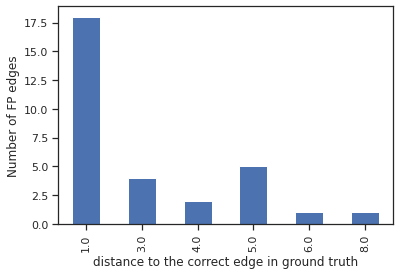

In [430]:
group_first_FPs = qgrid_widget.get_changed_df()
group_first_FPs.groupby(['distance']).count()
group_first_FPs.groupby('distance').count()['src'].plot.bar()
plt.xlabel('distance to the correct edge in ground truth')
plt.ylabel('Number of FP edges')

Text(0, 0.5, 'Number of FP edges')

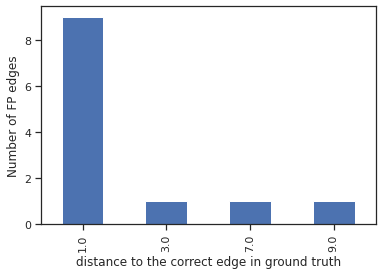

In [405]:
pivot_FPs = qgrid_widget.get_changed_df()
pivot_FPs.groupby(['distance']).count()
pivot_FPs.groupby('distance').count()['src'].plot.bar()
plt.xlabel('distance to the correct edge in ground truth')
plt.ylabel('Number of FP edges')

In [356]:
merge_FPs = qgrid_widget.get_changed_df()

In [359]:
merge_FPs.groupby(['stage_3_join']).count()


,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation,distance,...,stage_0,stage_2_inter,stage_2_inter_weight,stage_3_join_weight,stage_4_group,stage_4_group_weight,stage_6_transform,stage_6_transform_weight,stage_7_pivot,stage_7_pivot_weight
stage_3_join,,,,,,,,,,,,,,,,,,,,,
considered,24,24,24,24,24,24,24,24,0,24,...,24,24,24,24,0,0,0,0,0,0


Text(0, 0.5, 'Number of FP edges')

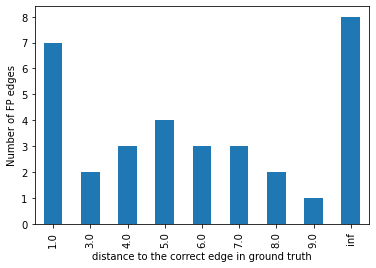

In [370]:
merge_FPs.groupby('distance').count()['src'].plot.bar()
plt.xlabel('distance to the correct edge in ground truth')
plt.ylabel('Number of FP edges')

In [333]:
new_edges.groupby('type').count()

,src,dest,notebook,metric,g_inferred,weight,g_truth,operation,distance,correct_node,...,stage_2_inter,stage_2_inter_weight,stage_3_join,stage_3_join_weight,stage_4_group,stage_4_group_weight,stage_6_transform,stage_6_transform_weight,stage_7_pivot,stage_7_pivot_weight
type,,,,,,,,,,,,,,,,,,,,,
cell,21,21,21,21,21,21,21,0,21,0,...,0,0,0,0,0,0,0,0,0,0
groupby,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,0,0,0
merge,33,33,33,33,33,33,33,0,33,25,...,25,25,24,24,0,0,0,0,0,0
pivot,12,12,12,12,12,12,12,0,12,12,...,12,12,12,12,12,12,12,12,12,12


In [341]:
import math

# True Negative Workflow

additional_cols = []
for ix, row in cell_TN.iterrows():
    stage_dict = {}
    try:
        stage_graph = get_stage_graph(row['notebook'],row['metric'])
        stage_dict = check_edge_stage_TN(row,stage_graph)
        #stage_dict.pop('weight')
    except Exception as e:
        print(ix, row['src'], row['dest'])
        raise e
    
    additional_cols.append(stage_dict)


cell_TN = pd.concat(
    [
        cell_TN,
        pd.DataFrame(additional_cols,
            index=cell_TN.index)
    ], axis=1
)


In [410]:
qgrid_widget = qgrid.show_grid(cell_TN, show_toolbar=True)
qgrid_widget


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [415]:
group_TN_edges = qgrid_widget.get_changed_df()
group_TN_edges.fillna(np.inf).groupby('stage_4_group_weight').count()

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation,weight,...,stage_1_intra_weight,stage_2_inter,stage_2_inter_weight,stage_3_join,stage_3_join_weight,stage_4_group,stage_6_transform,stage_6_transform_weight,stage_7_pivot,stage_7_pivot_weight
stage_4_group_weight,,,,,,,,,,,,,,,,,,,,,
0.218182,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.000000,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
inf,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22


In [215]:
#Trying to recompute the P/R/F1 if these edges were considered correct.

modified_results = all_results.copy()
for ix, row in new_edges.iterrows():
    loc_dict = {'src': row['src'], 'dest': row['dest'], 'notebook': row['notebook'], 'metric': row['metric']}
    relevant_row = modified_results.set_index(['src', 'dest', 'notebook', 'metric']).loc[loc_dict]
    

KeyError: 0

In [208]:
# Assume single NB/metric
def calculate_new_PR(df):
    TP = len(df.loc[(df.g_truth == True) & (df.g_inferred == True)].index)
    positive = len(df.loc[df['g_inferred'] == True].index)
    true = len(df.loc[df['g_truth'] == True].index)
    
    print(TP,positive, true)
    
    precision = TP/positive
    recall = TP/true
  
    return precision, recall

calculate_new_PR(all_results)

428 534 556


(0.8014981273408239, 0.7697841726618705)

In [206]:
all_FP

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation
27,40.csv,8.csv,20200529-101018,pc2cell+join+group+transform+pivot,True,pivot,1.000000,False,NaN
39,40.csv,14.csv,20200529-101018,pc2cell+join+group+transform+pivot,True,pivot,1.000000,False,NaN
40,40.csv,5.csv,20200529-101018,pc2cell+join+group+transform+pivot,True,pivot,1.000000,False,NaN
485,7.csv,27.csv,20200529-101018,pc2cell+join+group+transform+pivot,True,pivot,1.000000,False,NaN
604,52.csv,30.csv,20200529-101018,pc2cell+join+group+transform+pivot,True,merge,22.000000,False,NaN
606,52.csv,31.csv,20200529-101018,pc2cell+join+group+transform+pivot,True,merge,22.000000,False,NaN
877,9.csv,24.csv,20200529-101018,pc2cell+join+group+transform+pivot,True,merge,7.000000,False,NaN
913,23.csv,26.csv,20200529-101018,pc2cell+join+group+transform+pivot,True,groupby,1.000000,False,NaN
1046,12.csv,22.csv,20200529-101018,pc2cell+join+group+transform+pivot,True,merge,16.000000,False,NaN
1297,31.csv,24.csv,20200529-101018,pc2cell+join+group+transform+pivot,True,merge,6.000000,False,NaN


In [316]:
merge_edges

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation
130,1.csv,8.csv,20200529-101013,pc2cell+join+group+transform+pivot,False,NaN,NaN,True,merge
141,8.csv,7.csv,20200529-101013,pc2cell+join+group+transform+pivot,False,NaN,NaN,True,merge
188,14.csv,17.csv,20200529-101013,pc2cell+join+group+transform+pivot,False,NaN,NaN,True,merge
840,16.csv,22.csv,20200529-101018,pc2cell+join+group+transform+pivot,False,NaN,NaN,True,merge
1242,30.csv,31.csv,20200529-101018,pc2cell+join+group+transform+pivot,False,NaN,NaN,True,merge
105,45.csv,44.csv,20200529-101015,pc2cell+join+group+transform+pivot,False,NaN,NaN,True,merge
114,45.csv,43.csv,20200529-101015,pc2cell+join+group+transform+pivot,False,NaN,NaN,True,merge
680,22.csv,26.csv,20200529-101015,pc2cell+join+group+transform+pivot,False,NaN,NaN,True,merge
1029,25.csv,26.csv,20200529-101015,pc2cell+join+group+transform+pivot,False,NaN,NaN,True,merge
24,5.csv,0.csv,20200529-101010,pc2cell+join+group+transform+pivot,False,NaN,NaN,True,merge


In [323]:
all_results.loc[all_results.type=='merge']

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation
0,9.csv,15.csv,20200529-101013,pc2cell+join+group+transform+pivot,True,merge,8.647989,True,point_edit
8,9.csv,2.csv,20200529-101013,pc2cell+join+group+transform+pivot,True,merge,12.962644,False,NaN
32,15.csv,17.csv,20200529-101013,pc2cell+join+group+transform+pivot,True,merge,8.647989,False,NaN
103,45.csv,50.csv,20200529-101015,pc2cell+join+group+transform+pivot,True,merge,11.200000,True,point_edit
122,45.csv,2.csv,20200529-101015,pc2cell+join+group+transform+pivot,True,merge,11.200000,False,NaN
1000,10.csv,21.csv,20200529-101015,pc2cell+join+group+transform+pivot,True,merge,8.000000,True,nsmallest
1007,10.csv,16.csv,20200529-101015,pc2cell+join+group+transform+pivot,True,merge,5.250000,True,merge
1173,21.csv,34.csv,20200529-101015,pc2cell+join+group+transform+pivot,True,merge,8.000000,False,NaN
1363,16.csv,33.csv,20200529-101015,pc2cell+join+group+transform+pivot,True,merge,5.250000,True,sample
1364,16.csv,15.csv,20200529-101015,pc2cell+join+group+transform+pivot,True,merge,17.000000,True,merge


# Confusion Matrices

In [1148]:
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


def plot_edge_cf(cf, title='Edge Confusion Matrix', x='Inferred Edge', y='Ground Truth Edge'):
    disp = ConfusionMatrixDisplay(confusion_matrix=cf,
                                  display_labels=['False', 'True'])


    # NOTE: Fill all variables here with default values of the plot_confusion_matrix
    disp = disp.plot(values_format = '.0f')
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(np.arange(2), ['Negative', 'Positive'])

plt.show()

In [1149]:
all_results.type.value_counts()

col        437
cell       107
merge       58
groupby     32
Name: type, dtype: int64

In [1150]:
all_cf = confusion_matrix(pc2edges.g_truth, pc2edges.g_inferred)
all_cf

array([[7613,   33],
       [  36,  287]])

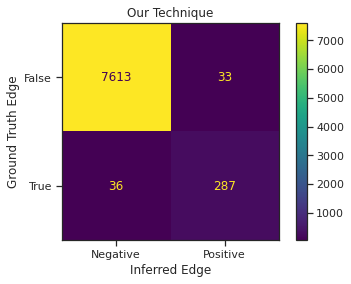

In [1152]:
plot_edge_cf(all_cf, 'Our Technique')

In [1155]:
col_cf = confusion_matrix(coledges.g_truth, coledges.g_inferred)
col_cf

array([[7603,   43],
       [  52,  271]])

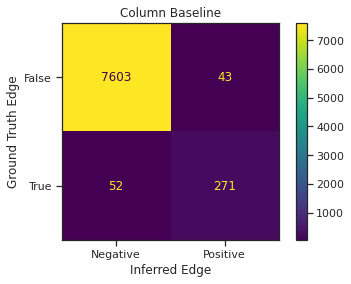

In [1157]:
plot_edge_cf(col_cf, 'Column Baseline')

In [30]:
all_results['cell'] = all_results.type == 'cell'
all_results

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation,cell
0,40.csv,0.csv,20200529-101018,cell+group+join+transform+pivot,True,cell,0.9995,True,point_edit,True
1,40.csv,2.csv,20200529-101018,cell+group+join+transform+pivot,False,NaN,NaN,False,NaN,False
2,40.csv,4.csv,20200529-101018,cell+group+join+transform+pivot,False,NaN,NaN,False,NaN,False
3,40.csv,13.csv,20200529-101018,cell+group+join+transform+pivot,False,NaN,NaN,False,NaN,False
4,40.csv,6.csv,20200529-101018,cell+group+join+transform+pivot,False,NaN,NaN,False,NaN,False
...,...,...,...,...,...,...,...,...,...,...
1535,41.csv,47.csv,20200529-101016,cell+group+join+transform+pivot,False,NaN,NaN,False,NaN,False
1536,41.csv,25.csv,20200529-101016,cell+group+join+transform+pivot,False,NaN,NaN,False,NaN,False
1537,53.csv,47.csv,20200529-101016,cell+group+join+transform+pivot,False,NaN,NaN,False,NaN,False
1538,53.csv,25.csv,20200529-101016,cell+group+join+transform+pivot,False,NaN,NaN,False,NaN,False


In [31]:
#group_ops = ['pivot', 'merge', 'groupby']
#all_cell_edges = all_results.loc[(all_results.type == 'cell') | ]
#| ((all_results.g_truth) & (all_results.type != 'cell')) ] #((~all_results.operation.isin(group_edges)) & (~all_results.operation.isna())) ]
cell_cf = confusion_matrix(all_results.g_truth, all_results.cell)
cell_cf

array([[6411,   25],
       [  87,  191]])

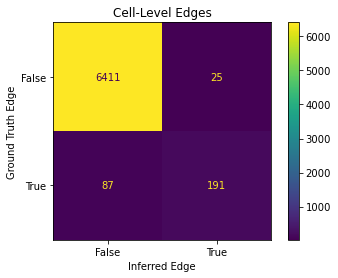

In [35]:
plot_edge_cf(cell_cf, 'Cell-Level Edges')

In [50]:
all_results['cellgroupbys'] = (all_results.type == 'groupby') | (all_results.type =='cell')
group_cf = confusion_matrix(all_results.g_truth, all_results.cellgroupbys)
group_cf

array([[6386,   50],
       [  75,  203]])

In [1064]:
all_group_edges = pc2edges.loc[(pc2edges.operation == 'groupby') ]

group_cf = confusion_matrix(all_group_edges.g_truth, all_group_edges.g_inferred)
group_cf

array([[ 0,  0],
       [ 5, 18]])

In [443]:
all_pivot_edges = all_results.loc[(all_results.type == 'pivot') | (all_results.operation == 'pivot') ]
pivot_cf = confusion_matrix(all_pivot_edges.g_truth, all_pivot_edges.g_inferred)
pivot_cf

array([[ 0,  9],
       [ 9, 15]])

In [445]:
all_merge_edges = all_results.loc[(all_results.type == 'merge') | (all_results.operation == 'merge') ]
merge_cf = confusion_matrix(all_merge_edges.g_truth, all_merge_edges.g_inferred)
merge_cf

array([[ 0,  1],
       [11, 40]])

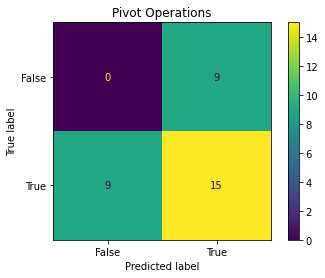

In [474]:
plot_edge_cf(pivot_cf, 'Pivot Operations')

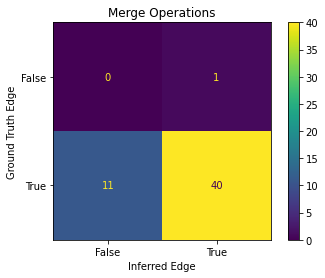

In [456]:
plot_edge_cf(merge_cf, 'Merge Operations')

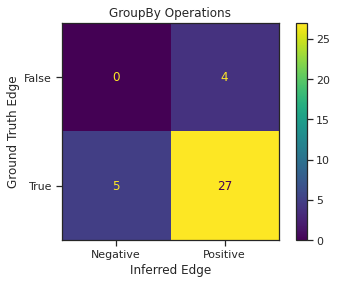

In [1057]:
plot_edge_cf(group_cf, 'GroupBy Operations')

In [453]:
def gt_sanity_check(RESULT_DIR, nb):
    df_dict = similarity.load_dataset_dir(RESULT_DIR+nb+'/artifacts/', '*.csv', index_col=0)
    g_truth = graphs.get_graph(RESULT_DIR, nb).to_undirected()
    
    for key in g_truth.nodes():
        if key not in df_dict:
            print('missing artifact',key, nb)
    
    for key in df_dict:
        if key not in g_truth.nodes():
            print('missing node', key, nb)
            print(g_truth.nodes())


    

In [454]:
[gt_sanity_check(RESULT_DIR,nb) for nb in notebooks]

[None, None, None, None, None, None, None]

In [70]:
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [35]:

# Assume this is a real merge pair, src,dst in TP, merge
def find_merge_pair(df, nb, src, dst):
    row = df.loc[((df.src == src) | (df.dest == src)) & (df.notebook == nb) & (df.operation == 'merge')]
    if not row.empty:
        return row
    else:
        row = df.loc[((df.src == dst) | (df.dest == dst)) & (df.notebook == nb) & (df.operation == 'merge')]
        return row
        
    

In [36]:
find_merge_pair(all_results, *('20200529-101010',  '5.csv', '16.csv'))

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation
24,5.csv,0.csv,20200529-101010,col,False,NaN,NaN,True,merge
26,5.csv,4.csv,20200529-101010,col,True,col,0.326853,True,merge
29,5.csv,16.csv,20200529-101010,col,True,col,0.629630,True,merge
24,5.csv,0.csv,20200529-101010,pc2cell+group+join+transform+pivot,False,NaN,NaN,True,merge
26,5.csv,4.csv,20200529-101010,pc2cell+group+join+transform+pivot,True,cell,0.290526,True,merge
29,5.csv,16.csv,20200529-101010,pc2cell+group+join+transform+pivot,False,NaN,NaN,True,merge


In [39]:
all_results.loc[(all_results.metric == 'pc2cell+group+join+transform+pivot') & (all_results.operation == 'merge')]

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation
9,40.csv,45.csv,20200529-101018,pc2cell+group+join+transform+pivot,True,cell,0.655172,True,merge
840,16.csv,22.csv,20200529-101018,pc2cell+group+join+transform+pivot,False,NaN,NaN,True,merge
1164,44.csv,45.csv,20200529-101018,pc2cell+group+join+transform+pivot,True,cell,0.275862,True,merge
1241,30.csv,35.csv,20200529-101018,pc2cell+group+join+transform+pivot,True,cell,0.529412,True,merge
1242,30.csv,31.csv,20200529-101018,pc2cell+group+join+transform+pivot,False,NaN,NaN,True,merge
1287,31.csv,28.csv,20200529-101018,pc2cell+group+join+transform+pivot,True,cell,0.555556,True,merge
1330,21.csv,22.csv,20200529-101018,pc2cell+group+join+transform+pivot,True,cell,0.529412,True,merge
1369,35.csv,34.csv,20200529-101018,pc2cell+group+join+transform+pivot,True,cell,0.529412,True,merge
1387,39.csv,34.csv,20200529-101018,pc2cell+group+join+transform+pivot,True,cell,0.529412,True,merge
1388,39.csv,38.csv,20200529-101018,pc2cell+group+join+transform+pivot,True,cell,0.529412,True,merge


In [84]:
import nppo

def find_merge_score(nb, d1, d2, d3):
    df_dict = similarity.load_dataset_dir(RESULT_DIR+nb+'/artifacts/', '*.csv', index_col=0)
    return nppo.score_join_schema(d1,d2,d3,df_dict, debug=True)


In [85]:
find_merge_score(*['20200529-101015', '45.csv', '43.csv', '44.csv'])

Join Key: randomize_nb_elements Containment 0.0
Join Key: pyfloat Containment 0.0
Join Key: unix_device Containment 0.0
Join Key: credit_card_expire Containment 0.0
Join Key: ipv4_public Containment 0.0
df1,df2,df3: 45.csv 44.csv 43.csv
column_sets: {'state', 'random_int', 'job', 'free_email', 'random_digit'} {'ascii_safe_email', 'random_number', 'numerify', 'pyint'} {'state', 'numerify', 'job', 'ascii_safe_email', 'random_digit', 'ipv4_public', 'free_email', 'random_number', 'random_int', 'pyint'}
join key: randomize_nb_elements
max_col_ratio, maxcontain 9.0 0.0


(('45.csv', '44.csv'), '43.csv', 0.0)

In [82]:
merge_pairs = [['20200529-101010',  '5.csv', '16.csv', '15.csv'],
['20200529-101015', '22.csv', '26.csv', '25.csv'],
['20200529-101015', '45.csv', '43.csv', '44.csv'],
['20200529-101016', '17.csv', '10.csv', '16.csv'],
['20200529-101016', '27.csv', '30.csv', '29.csv'],
['20200529-101016', '45.csv', '50.csv', '49.csv'],
['20200529-101016',  '9.csv',  '3.csv', '8.csv'],
['20200529-101018', '16.csv', '22.csv', '21.csv'],
['20200529-101018', '30.csv', '31.csv', '28.csv'],
['20200529-101019',  '1.csv', '12.csv', '11.csv'],
['20200529-101019', '24.csv', '22.csv', '23.csv'],
['20200529-101019', '31.csv', '30.csv', '24.csv'],
['20200601-152549', '11.csv', '17.csv', '16.csv']]

for pair in merge_pairs:
    print("PAIR", pair)
    print(find_merge_score(*pair))

PAIR ['20200529-101010', '5.csv', '16.csv', '15.csv']
(('15.csv', '5.csv'), '16.csv', 23.0)
PAIR ['20200529-101015', '22.csv', '26.csv', '25.csv']
(('22.csv', '25.csv'), '26.csv', 15.0)
PAIR ['20200529-101015', '45.csv', '43.csv', '44.csv']
(('45.csv', '44.csv'), '43.csv', 0.0)
PAIR ['20200529-101016', '17.csv', '10.csv', '16.csv']
(('16.csv', '10.csv'), '17.csv', 21.0)
PAIR ['20200529-101016', '27.csv', '30.csv', '29.csv']
(('27.csv', '29.csv'), '30.csv', 4.012345679012347)
PAIR ['20200529-101016', '45.csv', '50.csv', '49.csv']
(('45.csv', '49.csv'), '50.csv', 29.0)
PAIR ['20200529-101016', '9.csv', '3.csv', '8.csv']
(('8.csv', '3.csv'), '9.csv', 7.075962539021852)
PAIR ['20200529-101018', '16.csv', '22.csv', '21.csv']
(('16.csv', '21.csv'), '22.csv', 16.0)
PAIR ['20200529-101018', '30.csv', '31.csv', '28.csv']
(('30.csv', '28.csv'), '31.csv', 20.0)
PAIR ['20200529-101019', '1.csv', '12.csv', '11.csv']
(('11.csv', '1.csv'), '12.csv', 20.0)
PAIR ['20200529-101019', '24.csv', '22.csv', 

In [86]:
df_dict = similarity.load_dataset_dir(RESULT_DIR+'20200529-101015'+'/artifacts/', '*.csv', index_col=0)

In [66]:
set(df_dict['5.csv'].columns).intersection(set(df_dict['15.csv'].columns))

{'isbn10', 'street_suffix'}

In [90]:
df_dict['45.csv']

,free_email,ipv4_public,ascii_safe_email__x,state,job,random_int,pyint__x,random_number__x,random_digit,numerify__x,ascii_safe_email__y,credit_card_expire,randomize_nb_elements,numerify__y,random_number__y,pyfloat,pyint__y,unix_device
0,robertsmariah@hotmail.com,188.215.204.232,mgarcia@example.org,Mississippi,Advertising art director,4335.0,1385.0,322.0,8.0,401.0,dmoore@example.net,11/27,7.0,586.0,238.0,-3.352808e+01,3861.0,/dev/vdy
1,joseph31@yahoo.com,205.129.149.103,maria94@example.com,Missouri,Oncologist,65.0,4284.0,445957.0,8.0,386.0,kgamble@example.net,12/29,7.0,132.0,690101.0,1.155430e+11,6291.0,/dev/sdn
2,christina78@yahoo.com,118.64.136.192,jasminecollins@example.com,Ohio,Wellsite geologist,2249.0,6610.0,6.0,7.0,40.0,williamseduardo@example.org,07/27,11.0,52.0,52674.0,2.227144e+00,9578.0,/dev/vdn
3,emily51@gmail.com,208.70.117.40,michaelwatson@example.com,New Jersey,Patent examiner,3219.0,4026.0,38.0,7.0,423.0,flam@example.net,05/24,10.0,905.0,79.0,7.741104e+12,1028.0,/dev/sds
4,gturner@hotmail.com,98.220.193.234,eriley@example.net,Illinois,"Clinical scientist, histocompatibility and imm...",6850.0,8186.0,166.0,7.0,301.0,udickson@example.org,07/29,12.0,234.0,54.0,1.770663e+04,6026.0,/dev/xvdg
5,bridgetgibson@yahoo.com,117.24.191.189,virginia62@example.net,Virginia,Chartered accountant,4822.0,5070.0,67575.0,7.0,652.0,tcastro@example.net,05/25,7.0,528.0,821761665.0,-2.908795e+07,4539.0,/dev/sdn
6,jonathanharris@gmail.com,174.35.134.158,rochaamber@example.org,Washington,Systems analyst,6577.0,988.0,0.0,6.0,642.0,williamsontodd@example.com,11/23,9.0,85.0,6590992.0,-9.944000e+00,5129.0,/dev/sdh
7,thomaswolfe@gmail.com,128.137.245.161,matthew13@example.com,New Hampshire,"Scientist, research (life sciences)",4893.0,5517.0,65.0,6.0,731.0,curtis48@example.net,09/27,6.0,593.0,280592.0,8.316718e+09,7761.0,/dev/vdl
8,gking@yahoo.com,1.96.233.147,qnelson@example.org,Utah,Information officer,6993.0,6576.0,678.0,6.0,83.0,vbarnes@example.org,03/25,13.0,42.0,44706.0,8.448000e+03,2830.0,/dev/vda
9,gabrielgonzales@gmail.com,174.227.218.137,meghan65@example.net,Oklahoma,Archivist,3737.0,6143.0,9700.0,6.0,493.0,crystalwood@example.net,01/28,9.0,250.0,7610841.0,9.587200e+02,5066.0,/dev/vdk


# Learning NPPO Edge Categories from the Data:


In [639]:
#Load the dataframe here:
## import qgrid
qgrid_widget = qgrid.show_grid(all_results, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [640]:
group_edges = qgrid_widget.get_changed_df()
group_edges


,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation,stage_0,...,stage_2_inter_op,stage_3_group,stage_3_group_weight,stage_5_transform,stage_5_transform_weight,stage_6_pivot,stage_6_pivot_weight,stage_6_pivot_op,stage_3_group_op,stage_5_transform_op
16,40.csv,30.csv,20200529-101018,pc2cell+group+transform+pivot,False,NaN,0.001600,False,NaN,input,...,NaN,considered,0.0,considered,0.155307,considered,0.081633,NaN,NaN,NaN
17,40.csv,35.csv,20200529-101018,pc2cell+group+transform+pivot,False,NaN,0.001250,False,NaN,input,...,NaN,considered,0.0,considered,0.102813,considered,0.081633,NaN,NaN,NaN
18,40.csv,31.csv,20200529-101018,pc2cell+group+transform+pivot,False,NaN,0.000976,False,NaN,input,...,NaN,considered,0.0,considered,0.069932,considered,0.081633,NaN,NaN,NaN
19,40.csv,50.csv,20200529-101018,pc2cell+group+transform+pivot,False,NaN,0.000800,False,NaN,input,...,NaN,considered,0.0,considered,0.088818,considered,0.132231,NaN,NaN,NaN
20,40.csv,9.csv,20200529-101018,pc2cell+group+transform+pivot,False,NaN,0.000000,False,NaN,input,...,NaN,considered,0.0,considered,0.182500,considered,0.018765,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,41.csv,47.csv,20200529-101016,pc2cell+group+transform+pivot,False,NaN,0.000000,False,NaN,input,...,NaN,considered,0.0,considered,0.000000,considered,0.000000,NaN,NaN,NaN
1536,41.csv,25.csv,20200529-101016,pc2cell+group+transform+pivot,False,NaN,0.000000,False,NaN,input,...,NaN,considered,0.0,considered,0.000000,considered,0.000000,NaN,NaN,NaN
1537,53.csv,47.csv,20200529-101016,pc2cell+group+transform+pivot,False,NaN,0.000000,False,NaN,input,...,NaN,considered,0.0,considered,0.000000,considered,0.000000,NaN,NaN,NaN
1538,53.csv,25.csv,20200529-101016,pc2cell+group+transform+pivot,False,NaN,0.000000,False,NaN,input,...,NaN,considered,0.0,considered,0.000000,considered,0.000000,NaN,NaN,NaN


In [641]:
import nppo

# Function to compute Group Features in this stage
def df_groupby_check_new(d1, d2, df_dict, debug=False):
    #TODO: Column matching
    df1 = df_dict[d1]
    df2 = df_dict[d2]
    common_cols = set(list(df1)).intersection(set(list(df2)))

    src, dst = ((df1,df2) if len(df1.index) > len(df2.index) else (df2, df1))

    #Containment check and dividing columns into group and aggregate
    group_cols, agg_cols, missing_vals = nppo.get_group_agg_cols(src, dst)

    #TODO: Lattice exploration
    src_group_keyness_ratio = nppo.columnset_keyness_ratio(src, group_cols)
    dst_group_keyness_ratio = nppo.columnset_keyness_ratio(dst, group_cols)

    column_diff = similarity.set_jaccard_similarity(set(df1.columns),set(df2.columns))

    contraction_ratio =  len(src.index) / len(dst.index)

    final_val = ((1.0 * len(group_cols) * dst_group_keyness_ratio) - missing_vals) * column_diff
    
    return_dict = {
        'group_col_ratio' :  len(group_cols) / len(list(dst)),
        'agg_cols_ratio' :  len(agg_cols) / len(list(dst)),
        'contraction_ratio' : len(src.index) / len(dst.index),
        'missing_val_ratio' : missing_vals,
        'src_group_keyness_ratio' : src_group_keyness_ratio,
        'dst_group_keyness_ratio' : dst_group_keyness_ratio,
        'column_diff': column_diff,
        'group_cols': group_cols,
        'agg_cols': agg_cols
    }

    return return_dict

In [642]:
import nppo
from tqdm.auto import tqdm

def find_group_features(RESULT_DIR, df):
    
    df = df.sort_values('notebook')
    
    group_features = []
    
    previous_notebook = None
    for index, row in tqdm(df.iterrows(), total=len(df.index)):
        if row['notebook'] != previous_notebook:
            df_dict = similarity.load_dataset_dir(RESULT_DIR+row['notebook']+'/artifacts/', '*.csv', index_col=0)
            previous_notebook = row['notebook']
        
        #if row['operation'] in func_dict:
        #    df.loc[index,'score'] = func_dict[row['operation']](row['src'], row['dest'], df_dict, None)
        #else:
        #    df.loc[index,'score'] = None
        
        group_features.append(df_groupby_check_new(row['src'], row['dest'], df_dict))
        
        
    
    df = pd.concat(
        [
            df,
            pd.DataFrame(group_features,
                index=df.index)
        ], axis=1
    )

    
    
    return df




In [934]:
df = find_group_features(RESULT_DIR, groupby_considered_edges)
df

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation,stage_0,...,stage_5_transform_weight,group_col_ratio,agg_cols_ratio,contraction_ratio,missing_val_ratio,src_group_keyness_ratio,dst_group_keyness_ratio,column_diff,group_cols,agg_cols
90,14.csv,17.csv,20200624-154807,pc2cell+group+join+transform+pivot,False,NaN,0.000000,False,NaN,input,...,NaN,0.0000,0.142857,12.500000,0.0,0.010000,0.125000,0.047619,[],[ssn]
224,11.csv,1.csv,20200624-154807,pc2cell+group+join+transform+pivot,False,NaN,0.000000,False,NaN,input,...,NaN,0.0000,0.562500,5.250000,0.0,0.023810,0.125000,0.529412,[],"[random_letter, bs, domain_word, date, name_fe..."
222,11.csv,17.csv,20200624-154807,pc2cell+group+join+transform+pivot,False,NaN,0.000000,False,NaN,input,...,NaN,0.0625,0.000000,1.000000,0.0,0.625000,0.625000,0.045455,[ssn],[]
221,11.csv,9.csv,20200624-154807,pc2cell+group+join+transform+pivot,False,NaN,0.000000,False,NaN,input,...,NaN,0.0000,0.562500,1.750000,0.0,0.071429,0.125000,0.529412,[],"[random_letter, bs, domain_word, date, name_fe..."
220,7.csv,1.csv,20200624-154807,pc2cell+group+join+transform+pivot,False,NaN,0.000000,False,NaN,input,...,NaN,0.0000,0.562500,2.333333,0.0,0.023810,0.055556,0.529412,[],"[random_letter, bs, domain_word, date, name_fe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,17.csv,26.csv,20200624-154843,pc2cell+group+join+transform+pivot,False,NaN,0.000000,False,NaN,input,...,NaN,0.0000,0.000000,13.250000,0.0,0.009434,0.125000,0.000000,[],[]
331,17.csv,36.csv,20200624-154843,pc2cell+group+join+transform+pivot,False,NaN,0.000000,False,NaN,input,...,NaN,0.0000,0.000000,4.000000,0.0,0.125000,0.500000,0.000000,[],[]
350,27.csv,8.csv,20200624-154843,pc2cell+group+join+transform+pivot,False,NaN,0.000000,False,NaN,input,...,NaN,0.0000,0.000000,4.000000,0.0,0.125000,0.500000,0.000000,[],[]
337,27.csv,7.csv,20200624-154843,pc2cell+group+join+transform+pivot,False,NaN,0.283822,False,NaN,input,...,NaN,0.0000,1.000000,2.375000,0.0,0.052632,0.125000,0.993377,[],"[SVC, MKD, LSL, CZK, VND, SCR, PGK, ANG, NOK, ..."


In [935]:
df['contraction_inv'] = df['contraction_ratio'].apply(lambda x: np.reciprocal(x))
df

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation,stage_0,...,group_col_ratio,agg_cols_ratio,contraction_ratio,missing_val_ratio,src_group_keyness_ratio,dst_group_keyness_ratio,column_diff,group_cols,agg_cols,contraction_inv
90,14.csv,17.csv,20200624-154807,pc2cell+group+join+transform+pivot,False,NaN,0.000000,False,NaN,input,...,0.0000,0.142857,12.500000,0.0,0.010000,0.125000,0.047619,[],[ssn],0.080000
224,11.csv,1.csv,20200624-154807,pc2cell+group+join+transform+pivot,False,NaN,0.000000,False,NaN,input,...,0.0000,0.562500,5.250000,0.0,0.023810,0.125000,0.529412,[],"[random_letter, bs, domain_word, date, name_fe...",0.190476
222,11.csv,17.csv,20200624-154807,pc2cell+group+join+transform+pivot,False,NaN,0.000000,False,NaN,input,...,0.0625,0.000000,1.000000,0.0,0.625000,0.625000,0.045455,[ssn],[],1.000000
221,11.csv,9.csv,20200624-154807,pc2cell+group+join+transform+pivot,False,NaN,0.000000,False,NaN,input,...,0.0000,0.562500,1.750000,0.0,0.071429,0.125000,0.529412,[],"[random_letter, bs, domain_word, date, name_fe...",0.571429
220,7.csv,1.csv,20200624-154807,pc2cell+group+join+transform+pivot,False,NaN,0.000000,False,NaN,input,...,0.0000,0.562500,2.333333,0.0,0.023810,0.055556,0.529412,[],"[random_letter, bs, domain_word, date, name_fe...",0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,17.csv,26.csv,20200624-154843,pc2cell+group+join+transform+pivot,False,NaN,0.000000,False,NaN,input,...,0.0000,0.000000,13.250000,0.0,0.009434,0.125000,0.000000,[],[],0.075472
331,17.csv,36.csv,20200624-154843,pc2cell+group+join+transform+pivot,False,NaN,0.000000,False,NaN,input,...,0.0000,0.000000,4.000000,0.0,0.125000,0.500000,0.000000,[],[],0.250000
350,27.csv,8.csv,20200624-154843,pc2cell+group+join+transform+pivot,False,NaN,0.000000,False,NaN,input,...,0.0000,0.000000,4.000000,0.0,0.125000,0.500000,0.000000,[],[],0.250000
337,27.csv,7.csv,20200624-154843,pc2cell+group+join+transform+pivot,False,NaN,0.283822,False,NaN,input,...,0.0000,1.000000,2.375000,0.0,0.052632,0.125000,0.993377,[],"[SVC, MKD, LSL, CZK, VND, SCR, PGK, ANG, NOK, ...",0.421053


In [987]:
columns_to_drop = ['stage_5_transform', 'stage_5_transform_op',
       'stage_5_transform_weight', 'stage_6_pivot', 'stage_6_pivot_op',
       'stage_6_pivot_weight', 'stage_0', 'stage_1', 'stage_1_intra',
       'stage_1_intra_op', 'stage_1_intra_weight', 'stage_1_op']
#qgrid_widget = qgrid.show_grid(df.drop(columns_to_drop,axis=1), show_toolbar=True)
qgrid_widget = qgrid.show_grid(df, show_toolbar=True)

qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [939]:
group_CF_df = df.loc[(df.operation == 'groupby') | (df.type == 'groupby')]
group_CF_df

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation,stage_0,...,group_col_ratio,agg_cols_ratio,contraction_ratio,missing_val_ratio,src_group_keyness_ratio,dst_group_keyness_ratio,column_diff,group_cols,agg_cols,contraction_inv
104,5.csv,7.csv,20200624-154807,pc2cell+group+join+transform+pivot,True,groupby,0.000625,True,groupby,input,...,0.062500,0.937500,5.555556,0.000000,0.180000,1.0,1.000000,[city_suffix],"[random_letter, first_name_female, bs, mac_add...",0.180000
210,18.csv,11.csv,20200624-154807,pc2cell+group+join+transform+pivot,True,groupby,0.100649,True,merge,input,...,1.000000,0.000000,1.750000,0.000000,0.571429,1.0,0.727273,"[random_letter, first_name_female, bs, mac_add...",[],0.571429
212,18.csv,17.csv,20200624-154807,pc2cell+group+join+transform+pivot,True,groupby,0.035714,True,merge,input,...,1.000000,0.000000,1.750000,0.000000,0.571429,1.0,0.318182,"[safari, street_suffix, pyfloat, currency_code...",[],0.571429
223,11.csv,16.csv,20200624-154807,pc2cell+group+join+transform+pivot,True,groupby,0.000000,True,groupby,input,...,0.062500,0.937500,1.600000,0.000000,0.625000,1.0,1.000000,[first_name_female],"[zipcode, random_letter, bs, mac_address, doma...",0.625000
214,12.csv,13.csv,20200624-154808,pc2cell+group+join+transform+pivot,True,groupby,0.000000,True,groupby,input,...,0.100000,0.900000,5.000000,0.000000,0.200000,1.0,1.000000,[century],"[safe_email, randomize_nb_elements, md5, user_...",0.200000
174,0.csv,13.csv,20200624-154808,pc2cell+group+join+transform+pivot,True,groupby,0.000200,False,NaN,input,...,0.100000,0.900000,47.619048,0.000000,0.021000,1.0,1.000000,[century],"[safe_email, randomize_nb_elements, md5, user_...",0.021000
92,9.csv,19.csv,20200624-154810,pc2cell+group+join+transform+pivot,True,groupby,0.000000,True,groupby,input,...,0.050000,0.950000,1.111111,0.000000,0.900000,1.0,1.000000,[random_letter],"[user_name, secondary_address, last_name_femal...",0.900000
1502,39.csv,16.csv,20200624-154834,pc2cell+group+join+transform+pivot,True,groupby,0.125000,False,NaN,input,...,0.944444,0.055556,8.000000,0.000000,0.125000,1.0,1.000000,"[name, locale, randomize_nb_elements, numerify...",[file_extension],0.125000
1634,40.csv,32.csv,20200624-154834,pc2cell+group+join+transform+pivot,True,groupby,0.004464,False,NaN,input,...,0.125000,0.875000,13.500000,0.000000,0.074074,1.0,1.000000,[linux_processor],"[day_of_month, prefix_female, company_suffix, ...",0.074074
1687,24.csv,32.csv,20200624-154834,pc2cell+group+join+transform+pivot,True,groupby,0.000000,True,groupby,input,...,0.125000,0.875000,6.000000,0.000000,0.166667,1.0,1.000000,[linux_processor],"[day_of_month, prefix_female, company_suffix, ...",0.166667


In [988]:
group_features = [
    'notebook',
    'src',
    'dest',
    'g_inferred',
    'g_truth',
    'operation',
    'type',
    'group_col_ratio', 
    'agg_cols_ratio',
    'contraction_ratio', 
    'missing_val_ratio',
    'src_group_keyness_ratio',
    'dst_group_keyness_ratio',
    'column_diff',
    'stage_3_group_weight'
]


#group_CF_clean = group_CF_df[group_features]
group_CF_clean = df[group_features]
group_CF_clean['edge_cat'] = group_CF_clean.apply(lambda x: edge_cat(x['g_truth'], x['g_inferred']), axis=1)

<ipython-input-988-d2d26a83e0ad>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_CF_clean['edge_cat'] = group_CF_clean.apply(lambda x: edge_cat(x['g_truth'], x['g_inferred']), axis=1)


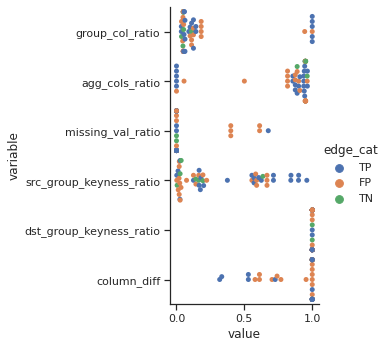

In [964]:
group_CF_melted = group_CF_clean.melt(id_vars='edge_cat', value_vars=['group_col_ratio', 
    'agg_cols_ratio',
    'missing_val_ratio',
    'src_group_keyness_ratio',
    'dst_group_keyness_ratio',
    'column_diff',
])


sns.catplot(x='value', y='variable', hue='edge_cat', data=group_CF_melted, kind='swarm')

In [965]:
group_CF_clean.groupby('edge_cat').count()

,g_inferred,g_truth,operation,type,group_col_ratio,agg_cols_ratio,contraction_ratio,missing_val_ratio,src_group_keyness_ratio,dst_group_keyness_ratio,column_diff,stage_3_group_weight
edge_cat,,,,,,,,,,,,
FP,22,22,0,22,22,22,22,22,22,22,22,22
TN,7,7,7,0,7,7,7,7,7,7,7,7
TP,23,23,23,23,23,23,23,23,23,23,23,23


In [610]:


df.columns.sort_values()

Index(['agg_cols', 'agg_cols_ratio', 'column_diff', 'contraction_inv',
       'contraction_ratio', 'dest', 'dst_group_keyness_ratio', 'g_inferred',
       'g_truth', 'group_col_ratio', 'group_cols', 'metric',
       'missing_val_ratio', 'notebook', 'operation', 'src',
       'src_group_keyness_ratio', 'stage_0', 'stage_1', 'stage_1_intra',
       'stage_1_intra_op', 'stage_1_intra_weight', 'stage_1_op',
       'stage_1_weight', 'stage_2_inter', 'stage_2_inter_op',
       'stage_2_inter_weight', 'stage_3_group', 'stage_3_group_op',
       'stage_3_group_weight', 'stage_5_transform', 'stage_5_transform_op',
       'stage_5_transform_weight', 'stage_6_pivot', 'stage_6_pivot_op',
       'stage_6_pivot_weight', 'type', 'weight'],
      dtype='object')

In [989]:
qgrid_widget = qgrid.show_grid(group_CF_clean, show_toolbar=True)
qgrid_widget


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [646]:
# Debug individual ratios
selected_row = qgrid_widget.get_selected_df()
selected_row

,src,dest,notebook,metric,g_inferred,type,weight,g_truth,operation,stage_1_weight,...,group_col_ratio,agg_cols_ratio,contraction_ratio,missing_val_ratio,src_group_keyness_ratio,dst_group_keyness_ratio,column_diff,group_cols,agg_cols,contraction_inv
13,2.csv,19.csv,20200529-101011,pc2cell+group+transform+pivot,False,NaN,0.001209,True,groupby,NaN,...,0.100000,0.900000,3.036145,0.0,0.329365,1.0,1.0,[first_name_male],"[randomize_nb_elements, numerify, random_eleme...",0.329365
83,7.csv,8.csv,20200601-152549,pc2cell+group+transform+pivot,False,NaN,0.000000,True,groupby,NaN,...,0.050000,0.950000,2.535484,0.0,0.394402,1.0,1.0,[first_name_male],"[bs, street_suffix, pyfloat, random_int, catch...",0.394402
17,15.csv,20.csv,20200601-152549,pc2cell+group+transform+pivot,False,NaN,0.000000,True,groupby,NaN,...,0.047619,0.952381,1.912281,0.0,0.522936,1.0,1.0,[first_name_male],"[bs, street_suffix, pyfloat, random_int, catch...",0.522936
405,2.csv,7.csv,20200529-101015,pc2cell+group+transform+pivot,False,NaN,0.004762,True,groupby,NaN,...,0.100000,0.900000,1.820513,0.0,0.549296,1.0,1.0,[state],"[numerify, job, random_int, ascii_safe_email, ...",0.549296
446,5.csv,6.csv,20200529-101015,pc2cell+group+transform+pivot,False,NaN,0.006024,True,groupby,NaN,...,0.100000,0.900000,1.769231,0.0,0.565217,1.0,1.0,[state],"[numerify, job, random_int, ascii_safe_email, ...",0.565217
209,9.csv,5.csv,20200601-152549,pc2cell+group+transform+pivot,False,NaN,0.000000,True,groupby,NaN,...,0.050000,0.950000,1.357143,0.0,0.736842,1.0,1.0,[first_name_male],"[bs, street_suffix, pyfloat, random_int, catch...",0.736842
468,7.csv,9.csv,20200529-101018,pc2cell+group+transform+pivot,False,NaN,0.002604,True,groupby,NaN,...,0.125000,0.875000,1.315068,0.0,0.760417,1.0,1.0,[street_suffix],"[zipcode_plus4, mac_processor, country_code, f...",0.760417
1063,11.csv,18.csv,20200529-101015,pc2cell+group+transform+pivot,False,NaN,0.001538,True,groupby,NaN,...,0.100000,0.900000,1.025641,0.0,0.975000,1.0,1.0,[job],"[state, numerify, random_int, ascii_safe_email...",0.975000
923,1.csv,4.csv,20200529-101019,pc2cell+group+transform+pivot,False,NaN,0.000152,True,groupby,NaN,...,0.050000,0.950000,1.007928,0.0,0.992135,1.0,1.0,[name_female],"[cryptocurrency_name, random_int, word, word.1...",0.992135
235,12.csv,14.csv,20200529-101011,pc2cell+group+transform+pivot,False,NaN,0.000437,True,groupby,NaN,...,0.100000,0.900000,75.666667,0.0,0.013216,1.0,1.0,[random_element],"[first_name_male, randomize_nb_elements, numer...",0.013216


In [652]:
inspect_row_dataframes(selected_row, rowid=3)

2.csv 7.csv


,free_email,ipv4_public,ascii_safe_email,state,job,random_int,pyint,random_number,random_digit,numerify
96,pflores@hotmail.com,213.115.88.58,zachary76@example.net,Massachusetts,Higher education lecturer,3479.0,8140.0,5351940.0,7.0,25.0
83,brittneydominguez@hotmail.com,31.171.13.240,roachraymond@example.com,Maryland,Clinical molecular geneticist,584.0,9087.0,82471.0,4.0,36.0
53,christina78@yahoo.com,118.64.136.192,jasminecollins@example.com,Ohio,Wellsite geologist,2249.0,6610.0,6.0,7.0,40.0
31,katrina84@hotmail.com,196.196.229.79,adam76@example.net,North Dakota,Senior tax professional/tax inspector,889.0,5147.0,20.0,4.0,61.0
61,davidrodriguez@gmail.com,61.56.47.84,pierceamanda@example.net,North Carolina,Medical sales representative,5268.0,9988.0,2.0,8.0,83.0
...,...,...,...,...,...,...,...,...,...,...
63,charles07@yahoo.com,34.238.147.53,donovandonald@example.org,Kentucky,"Producer, radio",6962.0,786.0,98210.0,3.0,715.0
30,bridget64@gmail.com,135.1.35.230,craig75@example.com,Delaware,Town planner,2332.0,2536.0,87656131.0,2.0,728.0
86,thomaswolfe@gmail.com,128.137.245.161,matthew13@example.com,New Hampshire,"Scientist, research (life sciences)",4893.0,5517.0,65.0,6.0,731.0
92,zmendoza@gmail.com,180.78.196.209,alyssahernandez@example.org,Illinois,"Engineer, manufacturing",3066.0,1115.0,7.0,8.0,763.0


,state,free_email,ipv4_public,ascii_safe_email,job,random_int,pyint,random_number,random_digit,numerify
0,Alaska,1,1,1,1,1,1,1,1,1
1,Arizona,1,1,1,1,1,1,1,1,1
2,Arkansas,2,2,2,2,2,2,2,2,2
3,California,1,1,1,1,1,1,1,1,1
4,Colorado,1,1,1,1,1,1,1,1,1
5,Connecticut,1,1,1,1,1,1,1,1,1
6,Delaware,3,3,3,3,3,3,3,3,3
7,Florida,1,1,1,1,1,1,1,1,1
8,Hawaii,2,2,2,2,2,2,2,2,2
9,Idaho,3,3,3,3,3,3,3,3,3


In [600]:
# Debug Column Containment Issues

row = selected_row.iloc[0]
df_dict = similarity.load_dataset_dir(RESULT_DIR+row['notebook']+'/artifacts/', '*.csv', index_col=0)
df1 = df_dict[row['src']]
df2 = df_dict[row['dest']]
nppo.get_group_agg_cols(df1,df2, debug=True)


Determining Group Cols: 
['numerify', 'prefix_male'] [1.0, 1.0]


(['numerify', 'prefix_male'],
 ['isbn10',
  'word',
  'prefix_female',
  'randomize_nb_elements',
  'street_address',
  'language_code',
  'pyfloat',
  'random_int__y',
  'bs',
  'random_int__x',
  'slug',
  'ipv4_public',
  'free_email',
  'first_name',
  'pyint',
  'unix_partition'],
 1.0)

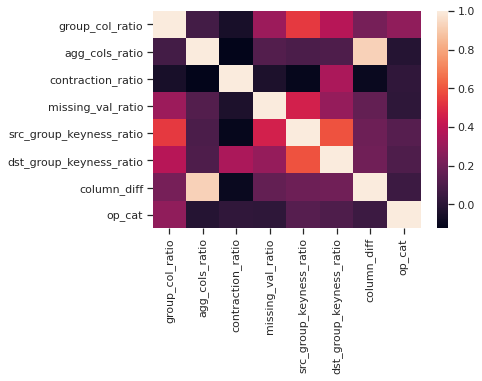

In [630]:
# Lets Plot each feature by edge type
#from sklearn.preprocessing import OrdinalEncoder

group_features = [
    'operation',
    'group_col_ratio', 
    'agg_cols_ratio',
    'contraction_ratio', 
    'missing_val_ratio',
    'src_group_keyness_ratio',
    'dst_group_keyness_ratio',
    'column_diff',
]

#enc = OrdinalEncoder()
df_features = df[group_features].fillna('No Edge')
#enc.fit(df_features['operation'])
#enc.transform(df_features)
df_features["operation"] = df_features["operation"].astype('category')
df_features['op_cat'] = df_features.operation.cat.codes
df_features.corr()

ax = sns.heatmap(df_features.corr())


In [623]:
df_features

,operation,group_col_ratio,agg_cols_ratio,contraction_ratio,missing_val_ratio,src_group_keyness_ratio,dst_group_keyness_ratio,column_diff,group_cols,agg_cols
122,No Edge,0.0,0.111111,69.000000,0.0,0.014493,1.000000,0.058824,[],[isbn10]
126,No Edge,0.0,0.222222,4.000000,0.0,0.250000,1.000000,0.080000,[],"[paragraph, isbn10]"
124,No Edge,0.0,0.111111,25.000000,0.0,0.040000,1.000000,0.055556,[],[isbn10]
104,No Edge,0.0,0.222222,2.857143,0.0,0.010000,0.028571,0.117647,[],"[isbn10, street_suffix]"
105,No Edge,0.0,0.222222,1.600000,0.0,0.017857,0.028571,0.080000,[],"[isbn10, street_suffix]"
...,...,...,...,...,...,...,...,...,...,...
205,No Edge,0.0,0.950000,3.833333,0.0,0.006211,0.023810,0.633333,[],"[bs, street_suffix, pyfloat, catch_phrase, fir..."
207,No Edge,0.0,0.100000,5.619048,0.0,0.004237,0.023810,0.074074,[],"[isbn13, random_int]"
164,No Edge,0.0,0.000000,456.000000,0.0,0.002193,1.000000,0.000000,[],[]
129,No Edge,0.0,0.952381,3.271930,0.0,0.002681,0.008772,0.952381,[],"[bs, street_suffix, pyfloat, random_int, catch..."


In [535]:
# Decision Tree Classifier


# Merge Edges

In [1045]:
def inspect_merge_dataframes(df, ix=0):
    df_dict = similarity.load_dataset_dir(RESULT_DIR+df.iloc[ix]['nb']+'/artifacts/', '*.csv', index_col=0)
    df1 = df_dict[df.iloc[ix]['merge_src'][0]]
    df2 = df_dict[df.iloc[ix]['merge_src'][1]]
    df3 = df_dict[df.iloc[ix]['merge_dest']]
    return df1,df2,df3

# Wrong!
def find_merge_triples_gt(RESULT_DIR, nb):
    g_truth = graphs.get_graph(RESULT_DIR, nb).to_undirected()
    merge_edges = []
    for e in g_truth.edges(data=True):
        if e[2]['operation'] == 'merge':
            found = False
            # Start with e[0]
            for e0_neighbor in g_truth.neighbors(e[0]):
                if e0_neighbor != e[1]:
                    if g_truth[e[0]][e0_neighbor]['operation'] == 'merge':
                        merge_edges.append(frozenset((e[0],e[1],e0_neighbor)))
                        found = True
            if not found:
                for e1_neighbor in g_truth.neighbors(e[1]):
                    if e1_neighbor != e[0]:
                        if g_truth[e[1]][e1_neighbor]['operation'] == 'merge':
                            merge_edges.append(frozenset((e[0],e[1],e1_neighbor)))
                            found = True
    return set(merge_edges)



def find_merge_triples_gt(RESULT_DIR, nb):
    g_truth = graphs.get_graph(RESULT_DIR, nb)
    merge_edges = []
    for v in g_truth.nodes():
        # Get all incoming edges
        #print(v, g_truth.in_edges(v))
        incoming_merges = tuple(e[0] for e in g_truth.in_edges(v, data=True) if e[2]['operation'] == 'merge')
        if incoming_merges:
            merge_edges.append(frozenset((incoming_merges[0], incoming_merges[1], v)))
        
    return set(merge_edges)

In [1110]:
# Only True Merge Edges in this flow:

import nppo

metrics = ['pc2cellcoltimestamp+group+join']


merge_results = pd.DataFrame()

for nb in notebooks:
    nb_dict = {}
    df_dict = similarity.load_dataset_dir(RESULT_DIR+nb+'/artifacts/', '*.csv', index_col=0)
    for metric in metrics:
        try:
            for merge_edge in find_merge_triples_gt(RESULT_DIR, nb):
                #print(merge_edge)
                src_pair, dest, score = nppo.score_join_schema(*merge_edge, df_dict)
                merge_results = merge_results.append({
                    'nb' : nb,
                    'metric' : metric,
                    'merge_edge' : merge_edge,
                    'join_score' : nppo.score_join_schema(*merge_edge, df_dict)[2],
                    'merge_src' : src_pair,
                    'merge_dest' : dest,
                    'join_score' : score
                }, ignore_index=True)
        except FileNotFoundError as e:
            raise

merge_results

/home/suhail/anaconda3/envs/relic/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,join_score,merge_dest,merge_edge,merge_src,metric,nb
0,16.000000,6.csv,"(5.csv, 2.csv, 6.csv)","(5.csv, 2.csv)",pc2cellcoltimestamp+group+join,20200704-124036
1,14.000000,8.csv,"(7.csv, 8.csv, 5.csv)","(7.csv, 5.csv)",pc2cellcoltimestamp+group+join,20200704-124036
2,31.000000,12.csv,"(11.csv, 9.csv, 12.csv)","(11.csv, 9.csv)",pc2cellcoltimestamp+group+join,20200704-124040
3,25.000000,9.csv,"(9.csv, 8.csv, 2.csv)","(8.csv, 2.csv)",pc2cellcoltimestamp+group+join,20200704-124040
4,30.000000,48.csv,"(38.csv, 48.csv, 47.csv)","(38.csv, 47.csv)",pc2cellcoltimestamp+group+join,20200704-124048
5,24.000000,15.csv,"(0.csv, 15.csv, 14.csv)","(0.csv, 14.csv)",pc2cellcoltimestamp+group+join,20200704-124048
6,15.000000,56.csv,"(53.csv, 56.csv, 55.csv)","(53.csv, 55.csv)",pc2cellcoltimestamp+group+join,20200704-124048
7,25.000000,32.csv,"(32.csv, 22.csv, 31.csv)","(22.csv, 31.csv)",pc2cellcoltimestamp+group+join,20200704-124048
8,32.000000,44.csv,"(43.csv, 42.csv, 44.csv)","(43.csv, 42.csv)",pc2cellcoltimestamp+group+join,20200704-124048
9,23.000000,13.csv,"(12.csv, 13.csv, 1.csv)","(12.csv, 1.csv)",pc2cellcoltimestamp+group+join,20200704-124048


In [981]:
import pickle

nb='20200624-154807'
metric='pc2cell+group+join+transform+pivot'
with open(RESULT_DIR+nb+'/inferred/'+metric+'_triple_dict.pkl', 'rb') as handle:
    triple_dict = pickle.load(handle)

#df_dict = similarity.load_dataset_dir(RESULT_DIR+nb+'/artifacts/', '*.csv', index_col=0)

In [982]:
triple_dict


{}

In [1113]:
# For all merge edges

import nppo



metrics = ['pc2cellcoltimestamp+group+join']


merge_results = pd.DataFrame()

for nb in sorted(notebooks):
    nb_dict = {}
    df_dict = similarity.load_dataset_dir(RESULT_DIR+nb+'/artifacts/', '*.csv', index_col=0)
    for metric in metrics:
        try:
            with open(RESULT_DIR+nb+'/inferred/'+metric+'_triple_dict.pkl', 'rb') as handle:
                triple_dict = pickle.load(handle)
                g_infered = graphs.get_graph_edge_list(RESULT_DIR, nb, metric)
                #print(triple_dict)
                for merge_edge in find_merge_triples_gt(RESULT_DIR, nb):
                    #print(merge_edge)
                    src_pair, dest, score = nppo.score_join_schema(*merge_edge, df_dict)
                    edge1_type = None
                    if g_infered.has_edge(src_pair[0], dest):
                        edge1_type = g_infered[src_pair[0]][dest]['type']

                    edge2_type = None
                    if g_infered.has_edge(src_pair[1], dest):
                        edge2_type = g_infered[src_pair[1]][dest]['type']

                    merge_results = merge_results.append({
                        'nb' : nb,
                        'metric' : metric,
                        'merge_edge' : merge_edge,
                        'join_score' : nppo.score_join_schema(*merge_edge, df_dict)[2],
                        'merge_src' : src_pair,
                        'merge_dest' : dest,
                        'join_score' : score,
                        'edge1_yes': g_infered.has_edge(src_pair[0], dest),
                        'edge1_type': edge1_type,
                        'edge2_yes': g_infered.has_edge(src_pair[1], dest),
                        'edge2_type' : edge2_type,
                        'considered' : merge_edge in triple_dict.keys()
                    }, ignore_index=True)
        except FileNotFoundError as e:
            print(nb)
            pass
            #raise

merge_results = merge_results.astype({'edge1_yes': bool, 'edge2_yes': bool})

20200704-124036
20200704-124037
20200704-124039
20200704-124040


/home/suhail/anaconda3/envs/relic/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


20200704-124048


In [1114]:
merge_results

,considered,edge1_type,edge1_yes,edge2_type,edge2_yes,join_score,merge_dest,merge_edge,merge_src,metric,nb
0,0.0,groupby,True,col,True,16.000000,59.csv,"(59.csv, 58.csv, 23.csv)","(58.csv, 23.csv)",pc2cellcoltimestamp+group+join,20200704-124042
1,1.0,None,False,None,False,6.382271,47.csv,"(47.csv, 45.csv, 46.csv)","(45.csv, 46.csv)",pc2cellcoltimestamp+group+join,20200704-124042
2,1.0,join,True,join,True,20.000000,31.csv,"(22.csv, 31.csv, 30.csv)","(22.csv, 30.csv)",pc2cellcoltimestamp+group+join,20200704-124042
3,1.0,None,False,None,False,8.569700,7.csv,"(7.csv, 4.csv, 6.csv)","(4.csv, 6.csv)",pc2cellcoltimestamp+group+join,20200704-124042
4,1.0,join,True,join,True,30.000000,62.csv,"(62.csv, 61.csv, 49.csv)","(61.csv, 49.csv)",pc2cellcoltimestamp+group+join,20200704-124042
5,1.0,None,False,None,False,14.000000,37.csv,"(30.csv, 37.csv, 36.csv)","(30.csv, 36.csv)",pc2cellcoltimestamp+group+join,20200704-124042
6,1.0,join,True,join,True,24.000000,49.csv,"(48.csv, 47.csv, 49.csv)","(48.csv, 47.csv)",pc2cellcoltimestamp+group+join,20200704-124042
7,1.0,None,False,col,True,13.000000,22.csv,"(22.csv, 10.csv, 21.csv)","(10.csv, 21.csv)",pc2cellcoltimestamp+group+join,20200704-124042
8,1.0,join,True,join,True,23.000000,39.csv,"(26.csv, 39.csv, 38.csv)","(26.csv, 38.csv)",pc2cellcoltimestamp+group+join,20200704-124042
9,1.0,None,False,None,False,15.000000,44.csv,"(38.csv, 43.csv, 44.csv)","(38.csv, 43.csv)",pc2cellcoltimestamp+group+join,20200704-124042


In [1048]:
test_triple = frozenset({'4.csv', '5.csv', '2.csv'})
nb = '20200629-114900'
with open(RESULT_DIR+nb+'/inferred/'+metric+'_triple_dict.pkl', 'rb') as handle:
    triple_dict = pickle.load(handle)

len(triple_dict.keys())

23121

In [1115]:
qgrid_widget = qgrid.show_grid(merge_results, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [1051]:
merge_results.groupby(['considered']).count()

,edge1_type,edge1_yes,edge2_type,edge2_yes,join_score,merge_dest,merge_edge,merge_src,metric,nb
considered,,,,,,,,,,
0.0,21,24,20,24,24,24,24,24,24,24
1.0,9,22,13,22,22,22,22,22,22,22


In [809]:
selected_row = qgrid_widget.get_selected_df()
df1,df2,df3 = inspect_merge_dataframes(selected_row,ix=0)

display(df1,df2,df3)

,free_email,ipv4_public,ascii_safe_email__x,state,job,random_int,pyint__x,random_number__x,random_digit,numerify__x,ascii_safe_email__y,credit_card_expire,randomize_nb_elements,numerify__y,random_number__y,pyfloat,pyint__y,unix_device
0,robertsmariah@hotmail.com,188.215.204.232,mgarcia@example.org,Mississippi,Advertising art director,4335.0,1385.0,322.0,8.0,401.0,dmoore@example.net,11/27,7.0,586.0,238.0,-3.352808e+01,3861.0,/dev/vdy
1,joseph31@yahoo.com,205.129.149.103,maria94@example.com,Missouri,Oncologist,65.0,4284.0,445957.0,8.0,386.0,kgamble@example.net,12/29,7.0,132.0,690101.0,1.155430e+11,6291.0,/dev/sdn
2,christina78@yahoo.com,118.64.136.192,jasminecollins@example.com,Ohio,Wellsite geologist,2249.0,6610.0,6.0,7.0,40.0,williamseduardo@example.org,07/27,11.0,52.0,52674.0,2.227144e+00,9578.0,/dev/vdn
3,emily51@gmail.com,208.70.117.40,michaelwatson@example.com,New Jersey,Patent examiner,3219.0,4026.0,38.0,7.0,423.0,flam@example.net,05/24,10.0,905.0,79.0,7.741104e+12,1028.0,/dev/sds
4,gturner@hotmail.com,98.220.193.234,eriley@example.net,Illinois,"Clinical scientist, histocompatibility and imm...",6850.0,8186.0,166.0,7.0,301.0,udickson@example.org,07/29,12.0,234.0,54.0,1.770663e+04,6026.0,/dev/xvdg
5,bridgetgibson@yahoo.com,117.24.191.189,virginia62@example.net,Virginia,Chartered accountant,4822.0,5070.0,67575.0,7.0,652.0,tcastro@example.net,05/25,7.0,528.0,821761665.0,-2.908795e+07,4539.0,/dev/sdn
6,jonathanharris@gmail.com,174.35.134.158,rochaamber@example.org,Washington,Systems analyst,6577.0,988.0,0.0,6.0,642.0,williamsontodd@example.com,11/23,9.0,85.0,6590992.0,-9.944000e+00,5129.0,/dev/sdh
7,thomaswolfe@gmail.com,128.137.245.161,matthew13@example.com,New Hampshire,"Scientist, research (life sciences)",4893.0,5517.0,65.0,6.0,731.0,curtis48@example.net,09/27,6.0,593.0,280592.0,8.316718e+09,7761.0,/dev/vdl
8,gking@yahoo.com,1.96.233.147,qnelson@example.org,Utah,Information officer,6993.0,6576.0,678.0,6.0,83.0,vbarnes@example.org,03/25,13.0,42.0,44706.0,8.448000e+03,2830.0,/dev/vda
9,gabrielgonzales@gmail.com,174.227.218.137,meghan65@example.net,Oklahoma,Archivist,3737.0,6143.0,9700.0,6.0,493.0,crystalwood@example.net,01/28,9.0,250.0,7610841.0,9.587200e+02,5066.0,/dev/vdk


,ascii_safe_email,credit_card_expire,randomize_nb_elements,numerify,random_number,pyfloat,pyint,unix_device,ipv4_public
0,dmoore@example.net,11/27,7.0,586.0,238.0,-3.352808e+01,3861.0,/dev/vdy,188.215.204.232
1,kgamble@example.net,12/29,7.0,132.0,690101.0,1.155430e+11,6291.0,/dev/sdn,205.129.149.103
2,williamseduardo@example.org,07/27,11.0,52.0,52674.0,2.227144e+00,9578.0,/dev/vdn,118.64.136.192
3,flam@example.net,05/24,10.0,905.0,79.0,7.741104e+12,1028.0,/dev/sds,208.70.117.40
4,udickson@example.org,07/29,12.0,234.0,54.0,1.770663e+04,6026.0,/dev/xvdg,98.220.193.234
5,tcastro@example.net,05/25,7.0,528.0,821761665.0,-2.908795e+07,4539.0,/dev/sdn,117.24.191.189
6,williamsontodd@example.com,11/23,9.0,85.0,6590992.0,-9.944000e+00,5129.0,/dev/sdh,174.35.134.158
7,curtis48@example.net,09/27,6.0,593.0,280592.0,8.316718e+09,7761.0,/dev/vdl,128.137.245.161
8,vbarnes@example.org,03/25,13.0,42.0,44706.0,8.448000e+03,2830.0,/dev/vda,1.96.233.147
9,crystalwood@example.net,01/28,9.0,250.0,7610841.0,9.587200e+02,5066.0,/dev/vdk,174.227.218.137


,free_email,ipv4_public,ascii_safe_email,state,job,random_int,pyint,random_number,random_digit,numerify
22,robertsmariah@hotmail.com,188.215.204.232,mgarcia@example.org,Mississippi,Advertising art director,4335.0,1385.0,322.0,8.0,401.0
66,joseph31@yahoo.com,205.129.149.103,maria94@example.com,Missouri,Oncologist,65.0,4284.0,445957.0,8.0,386.0
53,christina78@yahoo.com,118.64.136.192,jasminecollins@example.com,Ohio,Wellsite geologist,2249.0,6610.0,6.0,7.0,40.0
8,emily51@gmail.com,208.70.117.40,michaelwatson@example.com,New Jersey,Patent examiner,3219.0,4026.0,38.0,7.0,423.0
93,gturner@hotmail.com,98.220.193.234,eriley@example.net,Illinois,"Clinical scientist, histocompatibility and imm...",6850.0,8186.0,166.0,7.0,301.0
48,bridgetgibson@yahoo.com,117.24.191.189,virginia62@example.net,Virginia,Chartered accountant,4822.0,5070.0,67575.0,7.0,652.0
95,jonathanharris@gmail.com,174.35.134.158,rochaamber@example.org,Washington,Systems analyst,6577.0,988.0,0.0,6.0,642.0
86,thomaswolfe@gmail.com,128.137.245.161,matthew13@example.com,New Hampshire,"Scientist, research (life sciences)",4893.0,5517.0,65.0,6.0,731.0
70,gking@yahoo.com,1.96.233.147,qnelson@example.org,Utah,Information officer,6993.0,6576.0,678.0,6.0,83.0
87,gabrielgonzales@gmail.com,174.227.218.137,meghan65@example.net,Oklahoma,Archivist,3737.0,6143.0,9700.0,6.0,493.0


In [814]:
set(df2.columns)

{'ascii_safe_email',
 'credit_card_expire',
 'ipv4_public',
 'numerify',
 'pyfloat',
 'pyint',
 'random_number',
 'randomize_nb_elements',
 'unix_device'}

In [766]:
import nppo
import operator


def score_merge_triple_df(df, ix=0):
    df_dict = similarity.load_dataset_dir(RESULT_DIR+df.iloc[ix]['nb']+'/artifacts/', '*.csv', index_col=0)
    df1 = df.iloc[ix]['merge_src'][0]
    df2 = df.iloc[ix]['merge_src'][1]
    df3 = df.iloc[ix]['merge_dest']
    
    return score_join_schema(df1,df2,df3,df_dict, debug=True)


def score_join_schema(df1, df2, df3, df_dict, debug=False):
    combo_set = set((df1, df2, df3))
    max_combo = None
    max_col_number = 0

    columns_dict = {df: set(df_dict[df].columns) for df in combo_set}

    # First Check for at least one common column in triple to act as key
    common_cols = columns_dict[df1].intersection(columns_dict[df2]).intersection(columns_dict[df3])
    if not common_cols:
        if debug:
            print('No common cols')
        return ((df1, df2), df3, 0.0)

    for join_dest in combo_set:
        join_sources = combo_set - set([join_dest])

        # Whats the jaccard distance of the dest as a union of the sources?

        set_iterator = iter(join_sources)
        source = next(set_iterator)
        other_source = next(set_iterator)

        symm_diff = columns_dict[source].intersection(columns_dict[join_dest]) - columns_dict[other_source]
        column_union = symm_diff.union(columns_dict[other_source].intersection(columns_dict[join_dest]) - columns_dict[source])

        jaccard = similarity.set_jaccard_similarity(columns_dict[join_dest], column_union) * len(columns_dict[join_dest])

        if debug:
            pass
            #print('DEBUG', source, other_source, join_dest, column_union, jaccard)


        if jaccard > max_col_number:
            max_col_number = jaccard
            max_combo = (tuple(join_sources), join_dest)

    if not max_combo or not common_cols:
        #print('No Max combo')
        return ((df1, df2), df3, 0.0)


    df1, df2 = max_combo[0]
    df3 = max_combo[1]

    df1_columns = columns_dict[df1].intersection(columns_dict[df3]) - columns_dict[df2]
    df2_columns = columns_dict[df2].intersection(columns_dict[df3]) - columns_dict[df1]

    keys = columns_dict[df1].intersection(columns_dict[df2])

    containments = {}

    for join_key in keys: # Assuming single column join
        #intersecting_values = set(frozenset(v) for v in df_dict[df1][join_key].values).intersection(
        #    set(frozenset(v) for v in df_dict[df2][join_key].values))

        #key_list = list(v for fset in intersecting_values for v in fset)

        key_list = set(df_dict[df1][join_key].values).intersection(set(df_dict[df2][join_key].values))

        df1_merge_vals = df_dict[df1].loc[df_dict[df1][join_key].isin(key_list)]
        df2_merge_vals = df_dict[df2].loc[df_dict[df2][join_key].isin(key_list)]

        df1_containment = nppo.col_group_containment(df1_merge_vals, df_dict[df3], df1_columns)
        df2_containment = nppo.col_group_containment(df2_merge_vals, df_dict[df3], df2_columns)

        containments[join_key] = df1_containment * df2_containment

        if debug:
            print('Join Key:', join_key, 'Containment', containments[join_key])
            #print('Key List:', key_list)
            #print('df1_merge_vals', df1_merge_vals)
            #print('df2_merge_vales', df2_merge_vals)

    #print(df1_containment, df2_containment)

    max_containment = max(containments.items(), key=operator.itemgetter(1))[0]

    if debug:
        print('df1,df2,df3:', df1,df2,df3)
        print('column_sets:', df1_columns, df2_columns, columns_dict[df3])
        print('join key:', max_containment)

    #df1_containment = col_group_containment(df_dict[df1], df_dict[df3], df1_columns)
    #df2_containment = col_group_containment(df_dict[df2], df_dict[df3], df2_columns)

    if debug:
        #print('max_col_ratio, df1contain, df2contain', max_col_number, df1_containment, df2_containment)
        print('max_col_ratio, maxcontain', max_col_number, containments[max_containment])

    # TODO: Check coherency here

    return (max_combo[0], max_combo[1], max_col_number * containments[max_containment])

In [810]:
score_merge_triple_df(selected_row)

Join Key: randomize_nb_elements Containment 0.0
Join Key: pyfloat Containment 0.0
Join Key: unix_device Containment 0.0
Join Key: credit_card_expire Containment 0.0
Join Key: ipv4_public Containment 0.0
df1,df2,df3: 45.csv 44.csv 43.csv
column_sets: {'state', 'random_int', 'job', 'free_email', 'random_digit'} {'ascii_safe_email', 'random_number', 'numerify', 'pyint'} {'state', 'numerify', 'job', 'ascii_safe_email', 'random_digit', 'ipv4_public', 'free_email', 'random_number', 'random_int', 'pyint'}
join key: randomize_nb_elements
max_col_ratio, maxcontain 9.0 0.0


(('45.csv', '44.csv'), '43.csv', 0.0)

In [ ]:
# DF List Column Counts
from collections import Counter

def df_list_column_counts(df_list):
    colcount = Counter()
    for df in df_list:
        cols = set(df)
        for col in cols:
            colcount[col] +=1
    
    return colcount


def 